In [16]:
# !pip install rpy2

In [8]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S R
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1067%2F1925%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241108%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241108T103245Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0fb700ad598f391cf8cfa440c55d035466bd0a3b04c68a4cf4bdc25c829a46c06d7d4c499f17204620f69a94a0be32243d459f34d1f66f8760e23c81e6b80a2faebad984fe9d3d3af6470de6c2b82eee7919f57bd0b4b6c65240d065f6a34c0b5b66d1a0dbfb95ee4203aec579d5dc59e50d6d7814ebd7f80b200a3b1186505d3a1c1f35bb994731f877876c932bd4fb42904b786e52c4892456d4747fba9fe94f9357fdb16f171d56b2166b8428803e59694b69396433a0afb000972932eaf4876e8ffc357de1e599e2621b4f73de78f16cca66e11c4ebf81b62582575eb561b1f1730b4c7ca305eb83e08fc6b8305c836229b2f81dd876de7b835737bc929a'

KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'

system(paste0('sudo umount ', '/kaggle/input'))
system(paste0('sudo rmdir ', '/kaggle/input'))
system(paste0('sudo mkdir -p -- ', KAGGLE_INPUT_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_INPUT_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_INPUT_PATH,' ',file.path('..', 'input')),
  intern=TRUE)

system(paste0('sudo mkdir -p -- ', KAGGLE_WORKING_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_WORKING_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_WORKING_PATH, ' ', file.path('..', 'working')),
  intern=TRUE)

data_source_mappings = strsplit(DATA_SOURCE_MAPPING, ',')[[1]]
for (data_source_mapping in data_source_mappings) {
    path_and_url = strsplit(data_source_mapping, ':')
    directory = path_and_url[[1]][1]
    download_url = URLdecode(path_and_url[[1]][2])
    filename = sub("\\?.+", "", download_url)
    destination_path = file.path(KAGGLE_INPUT_PATH, directory)
    print(paste0('Downloading and uncompressing: ', directory))
    if (endsWith(filename, '.zip')){
      temp = tempfile(fileext = '.zip')
      download.file(download_url, temp)
      unzip(temp, overwrite = TRUE, exdir = destination_path)
      unlink(temp)
    }
    else{
      temp = tempfile(fileext = '.tar')
      download.file(download_url, temp)
      untar(temp, exdir = destination_path)
      unlink(temp)
    }
    print(paste0('Downloaded and uncompressed: ', directory))
}

print(paste0('Data source import complete'))


character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

[1] "Downloading and uncompressing: "
[1] "Downloaded and uncompressed: "
[1] "Data source import complete"


<h1 align="center"> <b> Employee Attritions </b> </h1><br>


Source of Image: <b> http://thecontextofthings.com/wp-content/uploads/2017/01/employee-attrition.jpg</b>


<h4>An Interesting Quote I Found: </h4>
<i>" Managers tend to blame their turnover problems on everything under the sun, while ignoring the crux of the matter: people don't leave jobs; they leave managers."</i> by Travis BradBerry <br><br>

<h3>A Note to my Fellow Kagglers: </h3>
I decided to publish this kernel even if still there is a lot to do with this kernel. Why? you might ask, the main reason why I decided to do this is to show the development of this kernel to the Kaggle community and to be open to new ideas that I could further implement in the future. So don't worry if you still see some descriptions not filled yet, I am aiming to fill all those descriptions while I work with this project. Can't wait to listen to your interesting suggestions! <br><br>

<h3>Introduction:  </h3>
Before starting with this project, I will like to give credit to Randy Lao and his <a src="https://www.kaggle.com/randylaosat/predicting-employee-kernelover"> Predicting Employee Kernelover </a>  that kernel gave me with a good idea of what Data Science is all about and the processes that must be done in order to become a complete Data Scientist. I will recommend  beginners in this field to give it a look at. <br><br>

<b> What are my aims with this project? </b><br>
<ul>
    <li><b>For beginners: </b> First of all, I must say that I am a beginner myself. I am practically new in the "R" world and I hope I can learn from everyone in this journey. Now my aim for beginners is to provide a solid reference in which beginners could look at when starting with the R programming language. If you feel you want to add something, write to me I am open to add things to this kernel and learn from all of you! </li>
    <li><b> Extensive Exploratory Data Analysis: </b>  One of the first things in my journey of Data Science, was to always know the story behind the data. What's the point of implementing predictive algorithms if you don't know what your data is about? My philosophy is to "drill down" the data until I find interesting insights that will give me a better understanding of my data. </li>
    <li><b>Recommendations: </b>What recommendations will I give the organization based on the analysis made with this data. How can the organization reduce the rate of attrition inside the company? In my opinion, this is the most important part of the analysis because it gives us a better understanding of what the organization could do to avoid the negative effect of attrition. </li>
    <li><b>Modeling:</b> Lastly, implement a predictive model to determine whether an employee is going to quit or not. </li>
    </ul>




So what is Attrition and what determines it?<br>
<b> Attrition:</b> It is basically the turnover rate of employees inside an organization. <br> <br>
<b>This can happen for many reasons:</b>
<ul>
    <li>Employees looking for better opportunities. </li>
    <li>A negative working environment. </li>
    <li> Bad management </li>
    <li>Sickness of an employee (or even death) </li>
    <li>Excessive working hours </li>
</ul><br><br>

<h3>Structure of the Project: </h3>
This project will be structured in the following way:
<ul>
    <li><b>Questions: </b> Questions will be asked previous to the visualization to make sure the visualizations shown in this project are insightful. </li>
    <li><b>Summary: </b> After each section I will provide a summary to understand what we got from the visualizations.</li>
    <li><b>Recommendations: </b> What recommendations could be given to the organization to reduce the <b>attrition rate</b>. </li>
</ul><br>

By structuring the project in this way, the flow of the project will be easier to grasp and at the same time it will make it easier for people who want to follow up through this kernel.

<h3> References: </h3>
<ul>
    <li>R for Data Science by Hadley Wickham and Garrett Grolemund (O'Reilly). Copyright 2017 Garret Grolemund, Hadley Wickham, 978-1-491-91039-9 </li>
    <li><a src="https://www.kaggle.com/jonathanbouchet/f1-data-analysis"> F1 Data analysis </a> by Jonathan Bouchet </li>
    </ul>

<br><br>
    
<h3> <b>Table of Contents:</b> </h3>
I. <b>General Information</b> <br>
a) [Summary of our Data:](#summary)<br>
b) [Distribution of our Labels](#distribution_labels)<br><br>

II. <b>Gender Analysis:</b> <br>
a) [Age Distribution by Gender](#age_distribution_gender)<br>
b) [Job Satisfaction Distribution by Gender](#jobsat_distribution)<br>
c) [Monthly Income by Gender](#monthly_income_gender) <br>
d) [Presence by Department](#presence_department) <br><br>


III.<b>Analysis by Genderation and Education:</b><br>
a) [Generational Behavior](#generational_behavior)<br>
b) [Understanding Attrition by Generation](#Attrition_Generation)<br><br>

IV. <b>The Impact of Income towards Attrition:</b><br>
a) [Average income by Department](#Income_department)<br>
b) [Determining Satisfaction by Income](#satisfaction_income)<br>
c) [Income and the Levels of Attrition](#income_attrition)<br>
d) [Average Daily Rates and Percent Difference](#pct_difference)<br>
e) [Level of Attrition by Overtime](#overtime_attrition)<br><br>

V. <b> Working Environment: </b><br>
a) [Number of Employees in each Job Role](#number_jobrole)<br>
b) [Median Salary by Job Role](#median_jobrole)<br>
c) [Attrition by Job Role](#attrition_role)<br>
d) [Current Managers and Average Satisfaction Score](#current_managers)<br>
e) [Average Environment Satisfaction](#average_environment)<br><br>

VI. <b> An In-depth Look into Attrition: </b><br>
a) [Digging into Attrition](#digging_attrition)<br>
b) [Other Factors that could Influence Attrition](#other_factors)<br><br>

VII. Analysis and Models<br>
a) [Correlation Matrix](#correlation_matrix)<br>
b) [Starting with Decision Trees](#decision)<br>
c) [Using Automated Machine Learning with H2o](#h2o)<br><br>

VIII. Conclusion<br>
a) [Top Reasons why Employees Leave the Organization](#top_reasons)



In [43]:
# # Import Libraries
# # if (!require("pacman")) install.packages("pacman")
# # pacman::p_load(tidyverse, skimr, GGally, plotly, viridis, caret, randomForest, e1071, rpart,
# #                xgboost, h2o, ggcorrplot, rpart.plot, corrgram, lightgbm, ggplot2, highcharter,
# #                ggthemes, psych, scales, treemap, treemapify, repr, cowplot, magrittr, ggpubr,
# #                RColorBrewer, plotrix, ggrepel, forcats, reshape2, caTools, tree, rattle)

# suppressPackageStartupMessages(library(tidyverse))
# suppressPackageStartupMessages(library(skimr))
# suppressPackageStartupMessages(library(GGally))
# suppressPackageStartupMessages(library(plotly))
# suppressPackageStartupMessages(library(viridis))
# suppressPackageStartupMessages(library(caret))
# suppressPackageStartupMessages(library(randomForest))
# suppressPackageStartupMessages(library(e1071))
# suppressPackageStartupMessages(library(rpart))
# suppressPackageStartupMessages(library(xgboost))
# suppressPackageStartupMessages(library(h2o))
# suppressPackageStartupMessages(library(ggcorrplot))
# suppressPackageStartupMessages(library(rpart.plot))
# suppressPackageStartupMessages(library(corrgram))
# suppressPackageStartupMessages(library(lightgbm))
# suppressPackageStartupMessages(library(ggplot2))
# suppressPackageStartupMessages(library(ggthemes))
# suppressPackageStartupMessages(library(psych))
# suppressPackageStartupMessages(library(scales))
# suppressPackageStartupMessages(library(treemap))
# suppressPackageStartupMessages(library(treemapify))
# suppressPackageStartupMessages(library(repr))
# suppressPackageStartupMessages(library(cowplot))
# suppressPackageStartupMessages(library(magrittr))
# suppressPackageStartupMessages(library(ggpubr))
# suppressPackageStartupMessages(library(RColorBrewer))
# suppressPackageStartupMessages(library(plotrix))
# suppressPackageStartupMessages(library(ggrepel))
# suppressPackageStartupMessages(library(forcats))
# suppressPackageStartupMessages(library(reshape2))
# suppressPackageStartupMessages(library(caTools))
# suppressPackageStartupMessages(library(tree))
# suppressPackageStartupMessages(library(rattle))

# options(repr.plot.width=8, repr.plot.height=6)
# options(warn=-1)

In [18]:
# Install necessary packages if they are not already installed.
if (!require("pacman")) install.packages("pacman")
pacman::p_load(tidyverse, skimr, GGally, plotly, viridis, caret, randomForest, e1071, rpart,
               xgboost, h2o, ggcorrplot, rpart.plot, corrgram, lightgbm, ggplot2, highcharter,
               ggthemes, psych, scales, treemap, treemapify, repr, cowplot, magrittr, ggpubr,
               RColorBrewer, plotrix, ggrepel, forcats, reshape2, caTools, tree, rattle)

# Now load the packages using suppressPackageStartupMessages
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(skimr))
suppressPackageStartupMessages(library(GGally))
# ... (rest of your library loading statements) ...

Loading required package: pacman

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pacman’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


skimr installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’



GGally installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘crosstalk’



plotly installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’



viridis installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘s

In [95]:
# Download the file using download.file()
url="https://github.com/dasarpai/DAI-Datasets/blob/main/WA_Fn-UseC_-HR-Employee-Attrition.csv"

url <- "https://raw.githubusercontent.com/dasarpai/DAI-Datasets/main/WA_Fn-UseC_-HR-Employee-Attrition.csv"

download.file(url,
              destfile = "WA_Fn-UseC_-HR-Employee-Attrition.csv",
              method = "wget")  # Or "curl", "auto" etc. depending on your system



<h2> Summary of our Data </h2><br>
<a id="summary"></a>
Before we get into the deep visualizations, we want to make sure how our data looks like right?  This will better help us have a better grasp as to how we should work with our data later throughout the project.

<h3>Questions we could Ask Ourselves: </h3>
<ul>
    <li><b>Columns and Observations: </b> How many columns and observations is there in our dataset?</li>
    <li><b>Missing data: </b> Are there any missing data in our dataset?  </li>
    <li><b>Data Type: </b> The different datatypes we are dealing in this dataset. </li>
    <li><b> Distribution of our Data: </b> Is it right-skewed, left-skewed or symmetric? This might be useful especially if we are implementing any type of statistical analysis or even for modelling. </li>
    <li><b>Structure of our Data: </b> Some datasets are a bit complex to work with however, the tidyverse package is really useful to deal with complex datasets.</li>
    <li><b> Meaning of our Data:</b> What does our data mean? Most features in this dataset are <b>ordinal variables </b> which are similar to categorical variables however, ordering of those variables matter. A lot of the variables in this dataset have a range from 1-4 or 1-5, <b>The lower the ordinal variable, the worse it is in this case. </b> For instance, Job Satisfaction 1 = "Low" while 4 = "Very High". </li>
    <li><b>Label:</b> What is our label in the dataset or in otherwords the output? </li>
    </ul><br>
    
    
    
 <h3>Summary: </h3>
 <ul>
    <li><b> Dataset Structure: </b> 1470 observations (rows), 35 features (variables) </li>
    <li><b>Missing Data: </b> Luckily for us, there is no missing data! this will make it easier to work with the dataset.</li>
    <li> <b>Data Type:</b> We only have two datatypes in this dataset: factors and integers</li>
        <li> <b>Label" </b> Attrition is the label in our dataset and we would like to find out why employees are leaving the organization!</li>
    <li><b>Imbalanced dataset: </b> 1237 (84% of cases) employees did not leave the organization while 237 (16% of cases) did leave the organization making our dataset to be considered <b>imbalanced </b> since more people stay in the organization than they actually leave. </li>
        </ul>



<h3>Distribution of our Labels: </h3>
<a id="distribution_labels"></a>
This is an important aspect that will be further discussed in this kernel and that is dealing with <b>imbalanced dataset.</b> <b>84%</b> of employees did not quit the organization while <b>16%</b> did leave the organization. Knowing that we are dealing with an imbalanced dataset will help us determine what will be the best approach to implement our predictive model.  

In [96]:
df <- read.csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
head(df)

# This will be used for training and testing.
original_df <- df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6


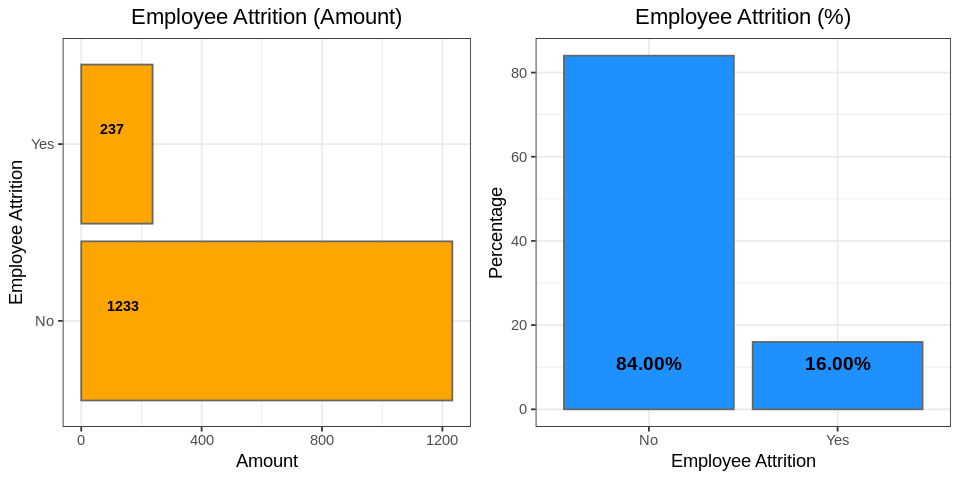

In [98]:
options(repr.plot.width=8, repr.plot.height=4)

attritions_number <- df %>% group_by(Attrition) %>% summarise(Count=n()) %>%
ggplot(aes(x=Attrition, y=Count)) + geom_bar(stat="identity", fill="orange", color="grey40") + theme_bw() + coord_flip() +
geom_text(aes(x=Attrition, y=0.01, label= Count),
            hjust=-0.8, vjust=-1, size=3,
            colour="black", fontface="bold",
         angle=360) + labs(title="Employee Attrition (Amount)", x="Employee Attrition",y="Amount") + theme(plot.title=element_text(hjust=0.5))

attrition_percentage <- df %>% group_by(Attrition) %>% summarise(Count=n()) %>%
mutate(pct=round(prop.table(Count),2) * 100) %>%
ggplot(aes(x=Attrition, y=pct)) + geom_bar(stat="identity", fill = "dodgerblue", color="grey40") +
geom_text(aes(x=Attrition, y=0.01, label= sprintf("%.2f%%", pct)),
            hjust=0.5, vjust=-3, size=4,
            colour="black", fontface="bold") + theme_bw() + labs(x="Employee Attrition", y="Percentage") +
labs(title="Employee Attrition (%)") + theme(plot.title=element_text(hjust=0.5))



plot_grid(attritions_number, attrition_percentage, align="h", ncol=2)

<h2> Gender Analysis: </h2>
In this section, we will try to see if there are any discrepancies between male and females in the organization. Also, we will look at other basic information such as the age, level of job satisfaction and average salary by gender. <br>


<h3> Questions to ask Ourselves: </h3>
<ul>
    <li>What is the age distribution between males and females? Are there any significant <b>discrepancies?</b>.  </li>
    <li>What is the average job satisfaction by <b>attrition status</b>? Is any type of gender more disatisfied than the other? </li>
    <li> What is the average salary by gender? What are the number of employees by Gender in each department?</li>
</ul>


<h3>Summary: </h3>
<ul>
    <li><b>Age by Gender:</b> The average age of females is 37.33 and for males is 36.65 and both distributions are <b>similar</b>. </li>
    <li><b> Job Satisfaction by Gender:</b> For individuals who didn't leave the organization, job satisfaction levels are practically the same. However, for people who <b>left the organization </b>, females had a lower satisfaction level as opposed to males. </li>
    <li><b> Salaries: </b>The average salaries for both genders are practically the same with <b>males</b> having an average of 6380.51 and <b>females</b> 6686.57 </li>
    <li><b>Departments:</b> There are a higher number of males in the three departments however, females are more predominant in the <b>Research and Development</b> department. </li>
</ul>

In [99]:
avg.age <- df %>% select(Gender, Age) %>% group_by(Gender) %>% summarize(avg=mean(Age))

avg.age

Gender,avg
<chr>,<dbl>
Female,37.32993
Male,36.65306


<h4><b>Age Distribution by Gender </b></h4>
<a id="age_distribution_gender"></a>

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


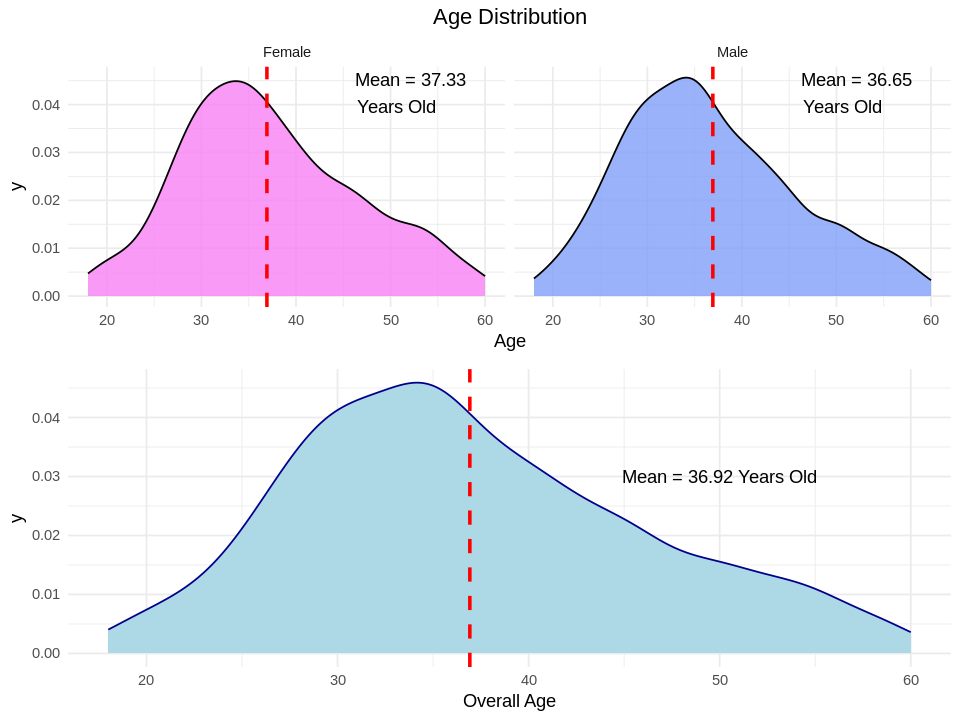

In [100]:
# Let's look closely at the distribution of the Age of our employees
# Why? Unlike the older generation, millenials tend to switch workplaces more and thus that could
# be an explanation of why we have the current levels of attrition
options(repr.plot.width=8, repr.plot.height=6)

dat_text <- data.frame(
  label = c("Mean = 37.33 \n Years Old", "Mean = 36.65 \n Years Old"),
  Gender   = c("Female", "Male")
)



gender.dist <- df %>% select(Gender, Age) %>% filter(Gender == 'Male' | Gender== "Female") %>%
filter(!is.na(Age)) %>% group_by(Gender) %>%
ggplot(aes(x=Age)) + geom_density(aes(fill=Gender), alpha=0.8, show.legend=FALSE) + facet_wrap(~Gender) + theme_minimal() +
geom_vline(aes(xintercept=mean(Age)),
            color="red", linetype="dashed", size=1) + labs(title="Age Distribution") +
theme(plot.title=element_text(hjust=0.5)) + scale_fill_manual(values=c("#F781F3", "#819FF7")) +
geom_text(
  data    = dat_text,
  mapping = aes(x = 45, y = 0.03, label = label),
  hjust   = -0.1,
  vjust   = -1
)


overall.dist <- df %>% select(Gender, Age) %>% filter(!is.na(Age)) %>%
ggplot(data=df, mapping=aes(x=Age)) + geom_density(color="darkblue", fill="lightblue") +
geom_vline(aes(xintercept=mean(Age)),
            color="red", linetype="dashed", size=1) +  theme_minimal() + labs(x="Overall Age") +
annotate("text", label = "Mean = 36.92 Years Old", x = 50, y = 0.03, color = "black")


plot_grid(gender.dist, overall.dist, nrow=2)

<h3><b>Distribution of Job Satisfaction:</b> </h3>
<a id="jobsat_distribution"></a>

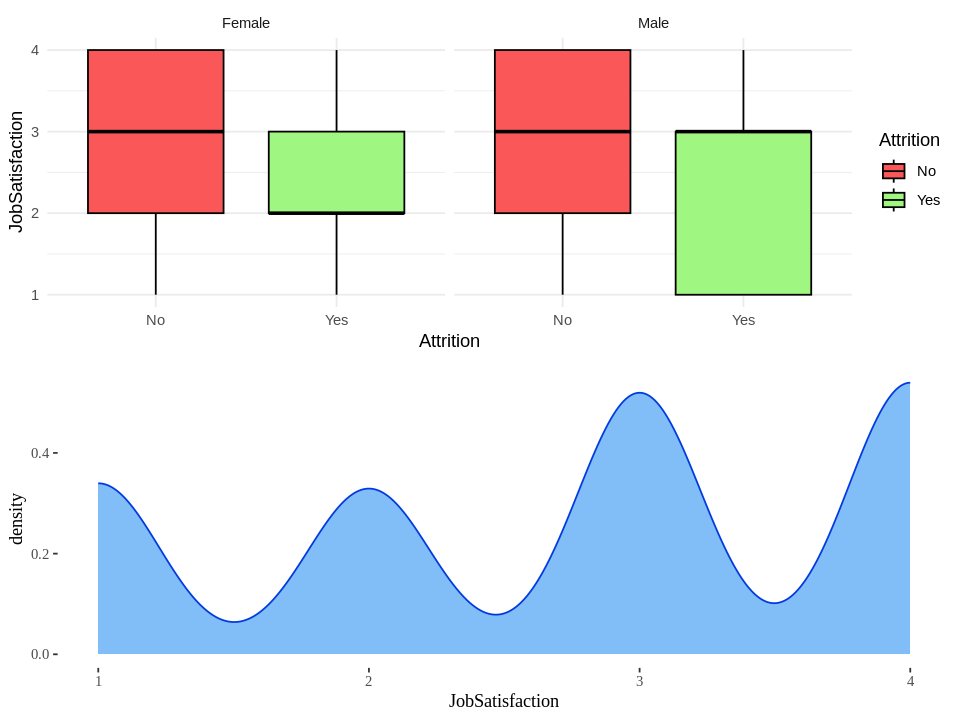

In [101]:
# Boxplot with attrition in the X-axis and Job Satisfaction in the y-Axis
options(repr.plot.width=8, repr.plot.height=6)


box.attrition <- df %>% select(Attrition, JobSatisfaction, Gender) %>%
ggplot(aes(x=Attrition, y=JobSatisfaction, fill=Attrition)) + geom_boxplot(color="black") + theme_minimal() + facet_wrap(~Gender) +
scale_fill_manual(values=c("#FA5858", "#9FF781"))


# Distribution of Job Satisfaction
dist.satisfaction <- df %>% select(JobSatisfaction) %>%
ggplot(aes(x=JobSatisfaction)) + geom_density(color="#013ADF", fill="#81BEF7", trim=TRUE) + theme_tufte() + xlim(range(c(1,4)))



plot_grid(box.attrition, dist.satisfaction, nrow=2)

<h3> <b>Monthly Income by Gender</b> </h3>
<a id="monthly_income_gender"></a>

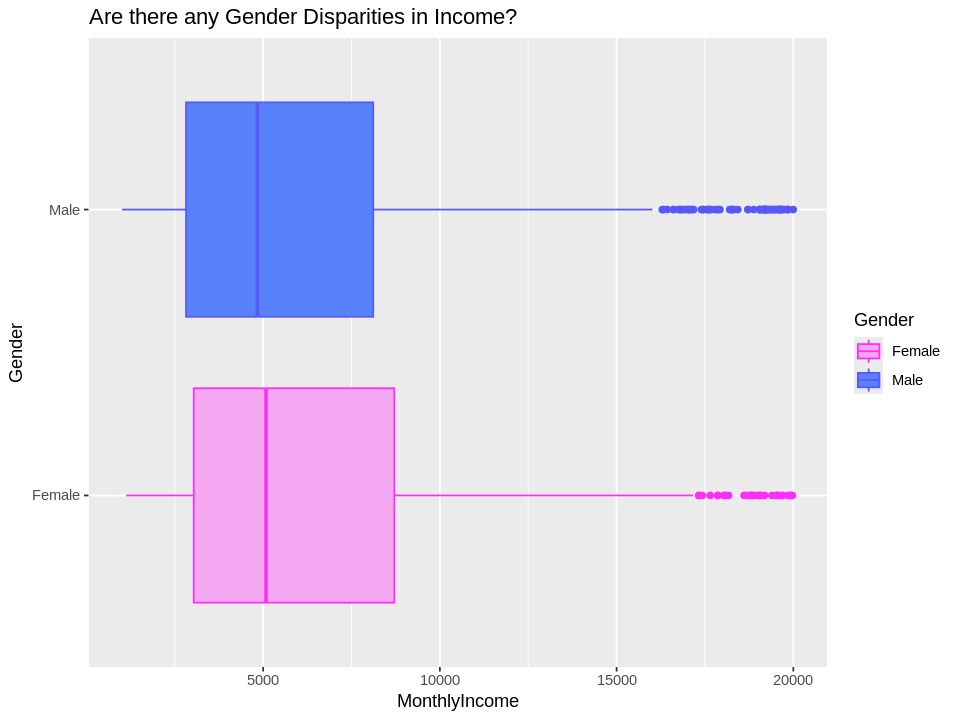

In [102]:
p <- ggplot(df, aes(x=Gender, y=MonthlyIncome, color=Gender, fill=Gender)) + geom_boxplot() +
scale_fill_manual(values=c("#F5A9F2", "#5882FA")) + scale_color_manual(values=c("#FE2EF7", "#5858FA")) +
coord_flip() + labs(title="Are there any Gender Disparities in Income?")

p

<h3><b>Average Income and Presence by Department</b> </h3>
<a id="presence_department"></a>

`summarise()` has grouped output by 'Department'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Department'. You can override using the
`.groups` argument.


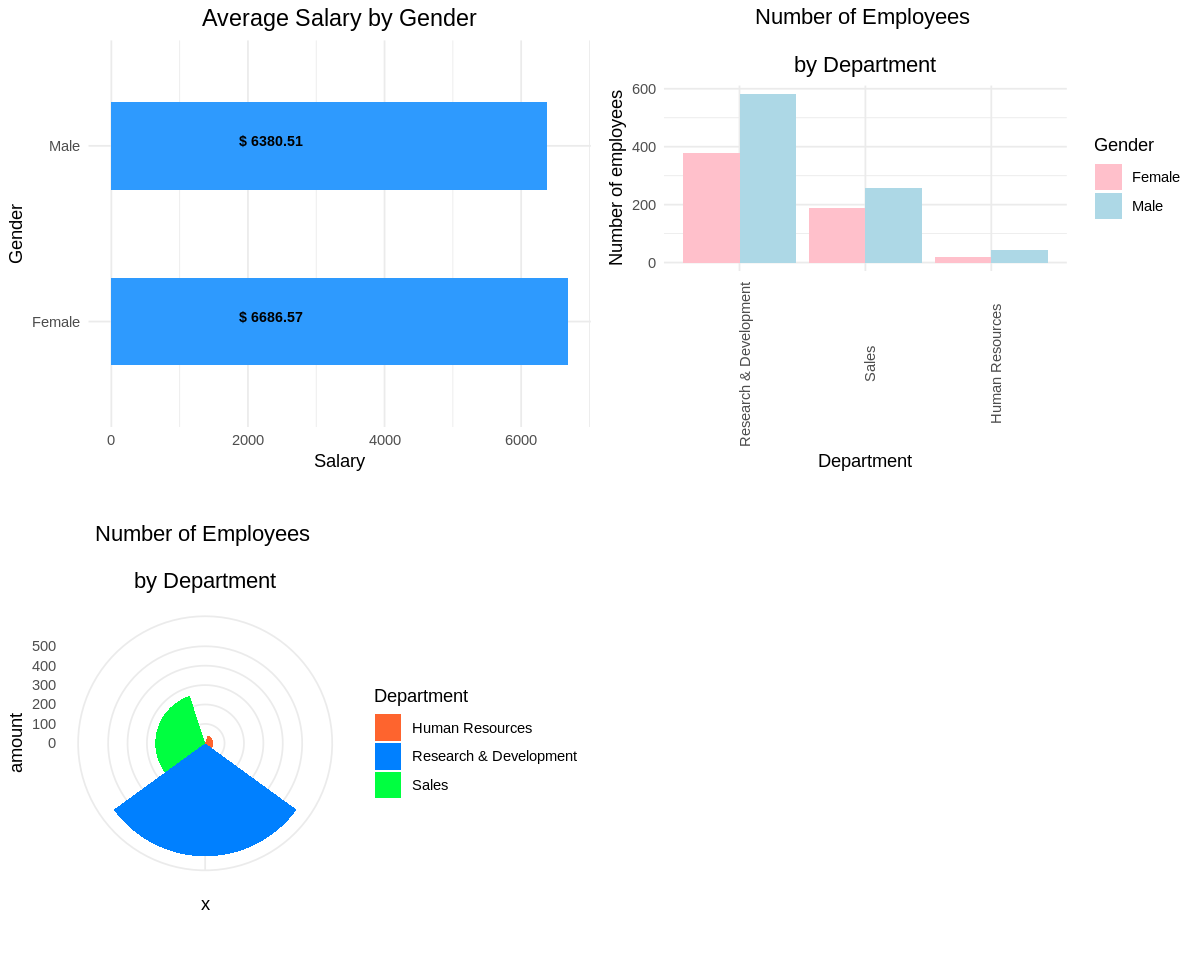

In [103]:
options(repr.plot.width=10, repr.plot.height=8)

gender.income <- df %>% select(Gender, MonthlyIncome) %>% group_by(Gender) %>% summarise(avg_income=round(mean(MonthlyIncome), 2)) %>%
ggplot(aes(x=Gender, y=avg_income)) + geom_bar(stat="identity", fill="#2E9AFE", width=0.5) +
geom_text(aes(x=Gender, y=0.01, label= paste0("$ ", avg_income)),
            hjust=-2, vjust=0, size=3,
            colour="black", fontface="bold",
         angle=360) + labs(title="Average Salary by Gender", x="Gender",y="Salary") + coord_flip() +
theme_minimal() + theme(plot.title=element_text(size=14, hjust=0.5))

# # How many people work in each department by gender
gender.department <- df %>% group_by(Department, Gender) %>% summarise(amount=n()) %>%
ggplot(aes(x=reorder(Department, -amount), y=amount, fill=Gender)) + geom_bar(stat="identity", position="dodge") + theme_minimal() +
theme(axis.text.x = element_text(angle = 90), plot.title=element_text(hjust=0.5)) + scale_fill_manual(values=c("pink", "lightblue")) +
labs(title="Number of Employees \n
by Department",x="Department", y="Number of employees")


departments <- df %>% group_by(Department, Gender) %>% summarise(amount=n()) %>%
ggplot(aes(x="", y=amount, fill=Department), show.legend=FALSE, width=) + geom_bar(stat="identity", position="dodge") + theme_minimal() +
theme(axis.text.x = element_text(angle = 90), plot.title=element_text(hjust=0.5), aspect.ratio=1) +
labs(title="Number of Employees \n
by Department") + coord_polar() + scale_fill_manual(values=c("#FE642E", "#0080FF","#00FF40"))

plot_grid(gender.income, gender.department, departments, ncol=2, nrow=2)

<h2>Analysis by Generation and Education: </h2>
It is well known, that each type of generation have their particular peculiarities and that is something I decided we should explore in this dataset. Nevertheless, there is still more coming in this section and I wonder what differences does each generation have when it comes to this dataset. <br>

<h3> Questions to Ask Ourselves: </h3>
<ul>
    <li> What is the average number of companies previously worked for each generation? My aim is to see if it is true that past generations used to stay longer in one company.</li>
</ul>

<h3> Summary: </h3>
<ul>
    <li><b>Employees who quit the organization:</b> For these type of employees we see that the boomers had a higher number of companies previously worked at. </li>
    <li><b>Millenials: </b> Most millenials are still relatively young, so that explains why the number of companies for millenials is relatively low however, I expect this number to increase as the years pass by. </li>
    <li><b>Attrition by Generation:</b> It seems that millenials are the ones with the <b>highest turnover rate</b>, followed by the boomers. <b>What does this tell us?</b> The newer generation which are the millenials opt to look more easy for other jobs that satisfy the needs on the other side we have the boomers which are approximating retirement and could be one of the reasons why the turnover rate of boomers is the second highest.</li>
    <li><b>Attrition by Level of Education:</b> This goes hand in hand with the previous statement, as bachelors are the ones showing the highest level of attrition which makes sense since Millenials create the highest turnover rate inside the organization. </li>
</ul>

<h3><b>Understanding Generational Behavior: </b> </h3>
<a id="generational_behavior"></a>

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
`summarise()` has grouped output by 'Generation'. You can override using the
`.groups` argument.


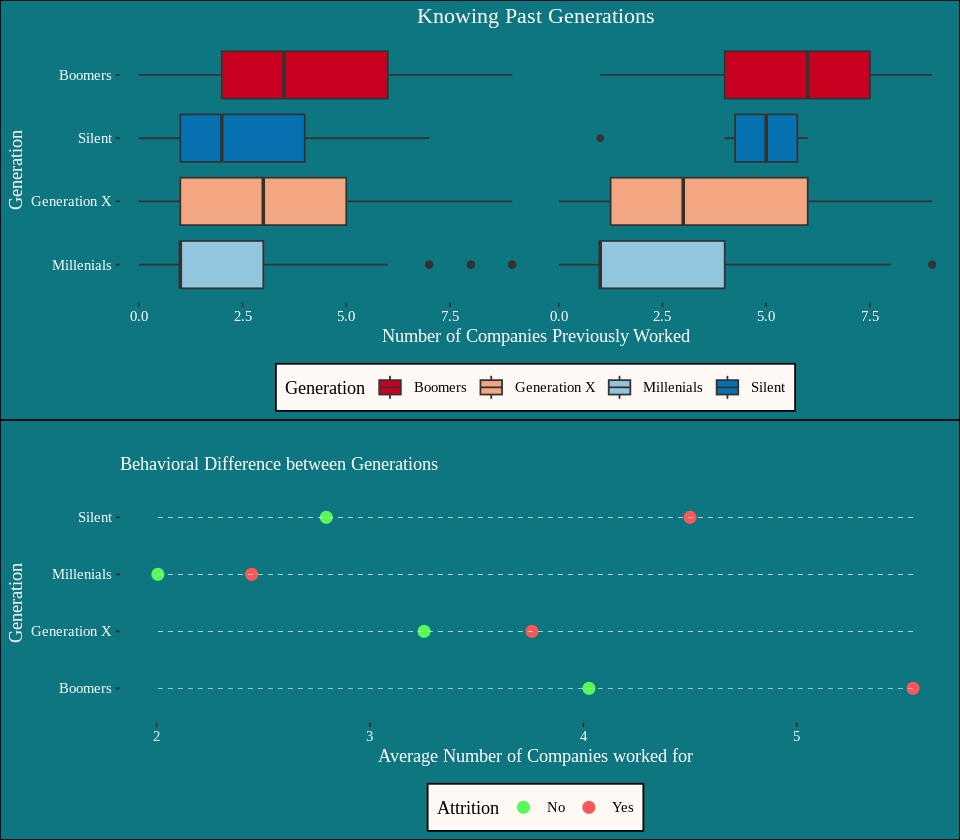

In [104]:
# Distribution of Number of Companies Worked by Attrition and Age
# We want to see if young people have worked in more companies than the older generation
# This might prove that the millenials tend to be more picky with regards to jobs than the older generation.
options(repr.plot.width=8, repr.plot.height=7)

# First we must create categoricals variables based on Age
df$Generation <- ifelse(df$Age<37,"Millenials",
ifelse(df$Age>=38 & df$Age<54,"Generation X",
ifelse(df$Age>=54 & df$Age<73,"Boomers","Silent"
)))


# Let's see the distribution by generation now
generation.dist <- df %>% select(Generation, NumCompaniesWorked, Attrition) %>%
ggplot() + geom_boxplot(aes(x=reorder(Generation, NumCompaniesWorked, FUN=median),
                                      y=NumCompaniesWorked, fill=Generation)) +
theme_tufte() + facet_wrap(~Attrition) +
scale_fill_brewer(palette="RdBu") + coord_flip() +
labs(title="Knowing Past Generations",x="Generation", y="Number of Companies Previously Worked") +
theme(legend.position="bottom", legend.background = element_rect(fill="#FFF9F5",
                                  size=0.5, linetype="solid",
                                  colour ="black")) + theme(strip.background = element_blank(), strip.text.x = element_blank(),
     plot.title=element_text(hjust=0.5, color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"))


# 2.69
overall.avg <- df %>% select(Generation, NumCompaniesWorked) %>% summarize(avg_ov=mean(NumCompaniesWorked))



# Let's find the Average Numbers of Companies worked by Generation
avg.comp <- df %>% select(Generation, NumCompaniesWorked, Attrition) %>% group_by(Generation, Attrition) %>%
summarize(avg=mean(NumCompaniesWorked)) %>%
ggplot(aes(x=Generation, y=avg, color=Attrition)) +
  geom_point(size=3) + theme_tufte() +  # Draw points
  geom_segment(aes(x=Generation,
                   xend=Generation,
                   y=min(avg),
                   yend=max(avg)),
               linetype="dashed",
               size=0.1,
              color="white") +
  labs(title="",
       subtitle="Behavioral Difference between Generations",
       y="Average Number of Companies worked for",
      x="Generation") +
  coord_flip() + scale_color_manual(values=c("#58FA58", "#FA5858")) +
theme(legend.position="bottom", legend.background = element_rect(fill="#FFF9F5",
                                  size=0.5, linetype="solid",
                                  colour ="black")) + theme(strip.background = element_blank(), strip.text.x = element_blank(),
     plot.title=element_text(hjust=0.5, color="white"),plot.subtitle=element_text(color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"))


plot_grid(generation.dist, avg.comp, nrow=2)

In [105]:
# Distribution of MonthlyIncome by Generation

options(repr.plot.width=8, repr.plot.height=5)

conti_df <- as.data.frame.matrix(table(df$Generation, df$Attrition))

conti_df$groupSum <- rowSums(conti_df)
conti_df$xmax <- cumsum(conti_df$groupSum)
conti_df$xmin <- conti_df$xmax - conti_df$groupSum
# The groupSum column needs to be removed; don't remove this line
conti_df$groupSum <- NULL

conti_df$Generation <- rownames(conti_df)

melt_df <- melt(conti_df, id.vars = c("Generation", "xmin", "xmax"), variable.name = "Attrition")

df_melt <- melt_df %>%
  group_by(Generation) %>%
  mutate(ymax = cumsum(value/sum(value)),
         ymin = ymax - value/sum(value))


index <- df_melt$xmax == max(df_melt$xmax)
df_melt$yposn <- df_melt$ymin[index] + (df_melt$ymax[index] - df_melt$ymin[index])/2


df_melt$xposn <- df_melt$xmin + (df_melt$xmax - df_melt$xmin)/2

# geom_text for ages (i.e. the x axis)

p1<- ggplot(df_melt, aes(ymin = ymin,
                 ymax = ymax,
                 xmin = xmin,
                 xmax = xmax,
                 fill = Attrition)) +
  geom_rect(colour = "white") +
  scale_x_continuous(expand = c(0,0)) +
  scale_y_continuous(expand = c(0,0)) +
  scale_fill_manual(values=c("#98fb98", "#ff6347")) +
theme(plot.title=element_text(hjust=0.5, color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"),
     legend.text=element_text(color="#595959",size=12),
     plot.subtitle=element_text(color="white", size=10, face= 'italic', hjust=0.5),
     legend.title=element_text(color="#595959"),
     legend.position="bottom", legend.background = element_rect(fill="#FFF9F5",
                                  size=0.5, linetype="solid",
                                  colour ="black"))

p1 +
  geom_text(aes(x = xposn, label = Generation),
            y = 0.15, angle = 90,
            size = 3, hjust = -1.22,
            show.legend = FALSE) + labs(title="Mosaic Plot", subtitle="Understanding both levels and frequencies of Attrition by Generation",
                                       x="Share of Employees", y="Frequency") +
theme(plot.title=element_text(hjust=0.5))

ERROR: [1m[33mError[39m in `$<-`:[22m
[1m[22m[33m![39m Assigned data `value` must be compatible with existing data.
[31m✖[39m Existing data has 8 rows.
[31m✖[39m Assigned data has 2 rows.
[36mℹ[39m Only vectors of size 1 are recycled.
[1mCaused by error in `vectbl_recycle_rhs_rows()`:[22m
[33m![39m Can't recycle input of size 2 to size 8.


<h3><b> Attrition by Educational Level: </b> </h3>
<a id="attrition_educational"></a>

`summarise()` has grouped output by 'Educational_Levels'. You can override
using the `.groups` argument.


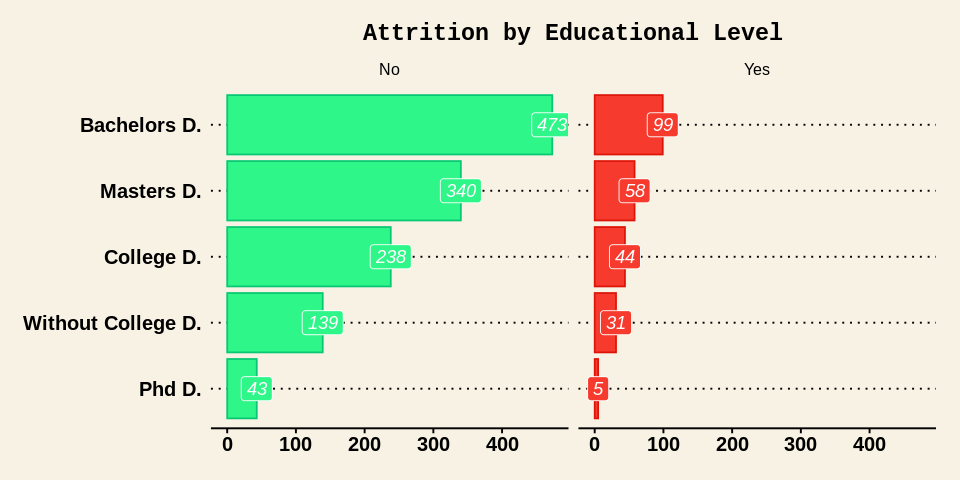

In [106]:
options(repr.plot.width=8, repr.plot.height=4)

# Give names for the different education levels.
df$Educational_Levels <-  ifelse(df$Education == 1, "Without College D.",
                            ifelse(df$Education == 2 , "College D.",
                                  ifelse(df$Education == 3, "Bachelors D.",
                                        ifelse(df$Education == 4, "Masters D.", "Phd D."))))

# I want to know in terms of proportions if we are loosing key talent here.
edu.level <- df %>% select(Educational_Levels, Attrition) %>% group_by(Educational_Levels, Attrition) %>%
summarize(n=n()) %>%
ggplot(aes(x=fct_reorder(Educational_Levels,n), y=n, fill=Attrition, color=Attrition)) + geom_bar(stat="identity") + facet_wrap(~Attrition) +
coord_flip() + scale_fill_manual(values=c("#2EF688", "#F63A2E")) + scale_color_manual(values=c("#09C873","#DD1509")) +
geom_label(aes(label=n, fill = Attrition), colour = "white", fontface = "italic") +
labs(x="", y="Number of Employees", title="Attrition by Educational Level") + theme_wsj() +
theme(legend.position="none", plot.title=element_text(hjust=0.5, size=14))

edu.level

`summarise()` has grouped output by 'Educational_Levels'. You can override
using the `.groups` argument.


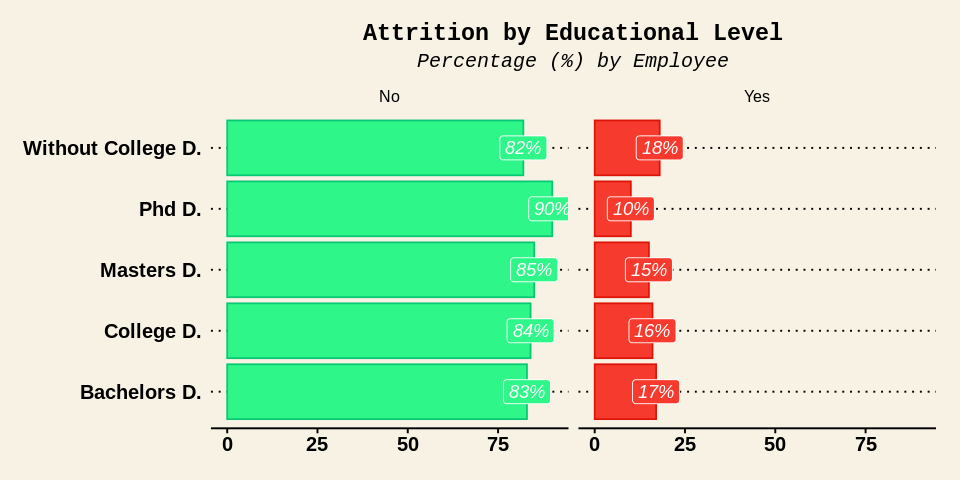

In [108]:
edu.pct <- df %>% select(Educational_Levels, Attrition) %>% group_by(Educational_Levels, Attrition) %>%
summarize(n=n()) %>% mutate(pct=round(prop.table(n),2) * 100) %>% arrange(desc(pct)) %>%
ggplot(aes(x=fct_reorder(Educational_Levels,pct), y=pct, fill=Attrition, color=Attrition)) + geom_bar(stat="identity") + facet_wrap(~Attrition) +
coord_flip() + geom_label(aes(label=paste0(pct, "%"), fill = Attrition), colour = "white", fontface = "italic") +
scale_fill_manual(values=c("#2EF688", "#F63A2E")) + scale_color_manual(values=c("#09C873","#DD1509")) +
labs(x="", y="Number of Employees (%)", title="Attrition by Educational Level", subtitle="Percentage (%) by Employee")+ theme_wsj() +
theme(legend.position="none", plot.title=element_text(hjust=0.5, size=14), plot.subtitle=element_text(hjust=0.5, size=12, face="italic"))

edu.pct

<h2> The Impact of Income towards Attrition </h2>
I wonder how much importance does each employee give to the income they earn in the organization. Here we will find out if it is true that money is really everything!<br>

<h3> Questions to Ask Ourselves </h3>
<ul>
    <li>What is the average monthly income by <b>department</b>? Are there any significant differences between individuals who quit and didn't quit? </li>
    <li>Are there significant changes in the <b>level of income by Job Satisfaction</b>? Are individuals with a <b>lower satisfaction</b> getting much less income than the ones who are more satisfied? </li>
    <li>Do employees who <b>quit the organization</b> have a much lower income than people who <b>didn't quit the organization</b>? </li>
    <li>Do employees with a higher performance rating earn more than with a lower performance rating? Is the difference significant by Attrition status? </li>
</ul><br>


<h3>Summary: </h3>
<ul>
    <li><b>Income by Departments: </b> Wow! We can see huge differences in each department by <b>attrition status. </b> </li>
    <li><b>Income by Job Satisfaction: </b> Hmm. It seems the lower the job satisfaction the<b> wider the gap</b> by attrition status in the levels of income. </li>
    <li><b>Attrition sample population: </b> I would say that most of this sample population has had a <b>salary increase</b> of less than 15% and a <b>monthly income</b> of less than 7,000 </li>
    <li><b>Exhaustion at Work: </b>  Over 54% of workers who left the organization worked<b> overtime</b>! Will this be a reason why employees are leaving?</li>
    <li><b>Differences in the DailyRate: </b><b>HealthCare Representatives </b>, <b>Sales Representatives </b>, and <b>Research Scientists </b> have the biggest daily rates differences in terms of employees who quit or didn't quit the organization. This might indicate that at least for the these roles, the sample population that left the organization was mainly because of income. </li>
</ul>

<h3><b> Average Income by Department: </b></h3>
<a id="Income_department"></a>

`summarise()` has grouped output by 'Attrition'. You can override using the
`.groups` argument.


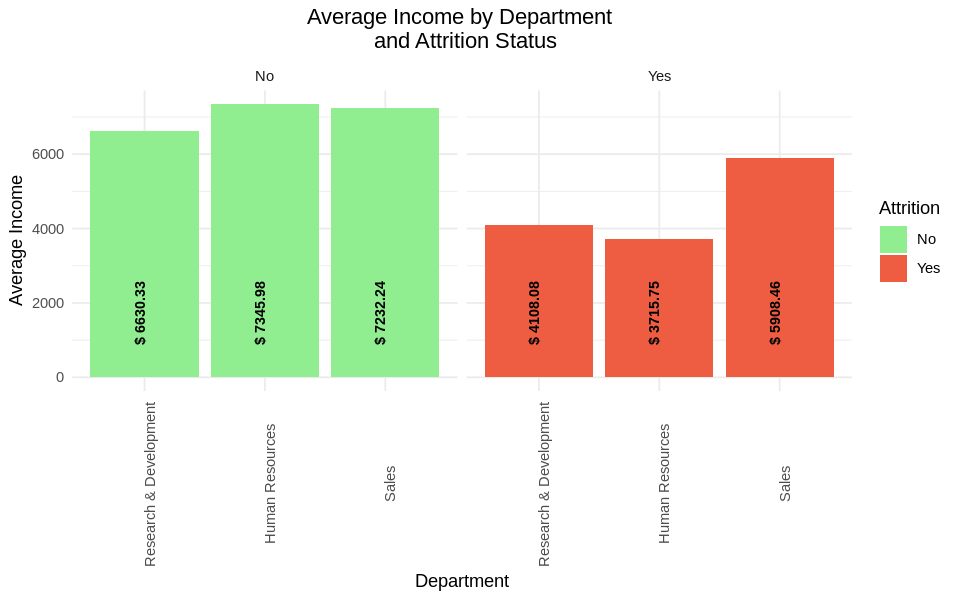

In [109]:
# Let's determine if income was a major factor when it came to leaving the company.
# Let's start by taking the average monthly income of people who left the company and people who stayed in the company
# Group by department
options(repr.plot.width=8, repr.plot.height=5)


avg.income <- df %>% select(Department, MonthlyIncome, Attrition) %>% group_by(Attrition, Department) %>%
summarize(avg.inc=mean(MonthlyIncome)) %>%
ggplot(aes(x=reorder(Department, avg.inc), y=avg.inc, fill=Attrition)) + geom_bar(stat="identity", position="dodge") + facet_wrap(~Attrition) +
theme_minimal() + theme(axis.text.x = element_text(angle = 90), plot.title=element_text(hjust=0.5)) +
scale_fill_manual(values=c("lightgreen", "tomato2")) +
labs(y="Average Income", x="Department", title="Average Income by Department \n and Attrition Status") +
geom_text(aes(x=Department, y=0.01, label= paste0("$ ", round(avg.inc,2))),
            hjust=-0.5, vjust=0, size=3,
            colour="black", fontface="bold",
         angle=90)


avg.income

<h3><b>Determining Satisfaction by Income:</b> </h3>
<a id="satisfaction_income"></a>

`summarise()` has grouped output by 'JobSatisfaction'. You can override using
the `.groups` argument.


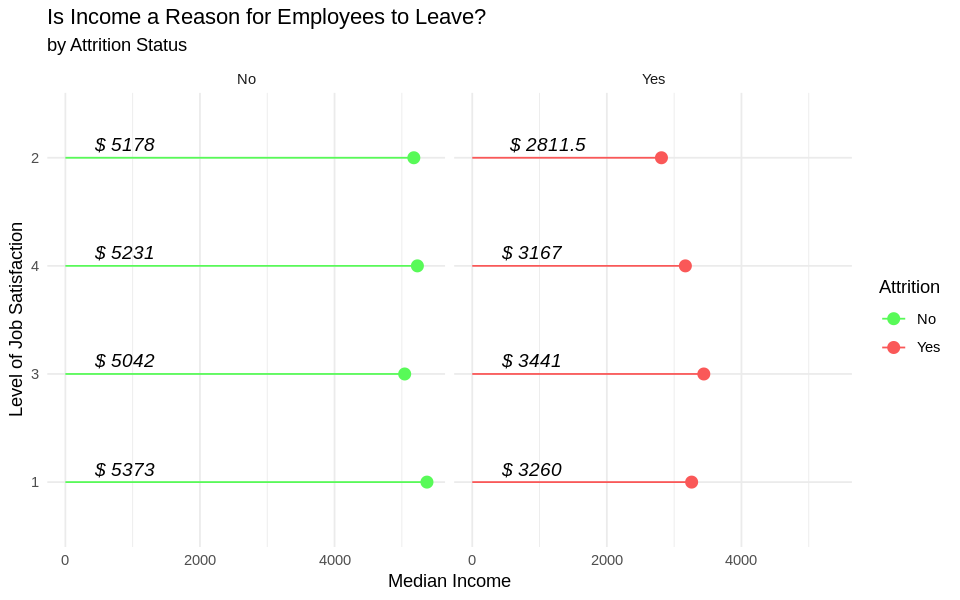

In [110]:
options(repr.plot.width=8, repr.plot.height=5)

# Turn the column to factor: One because it should not be considered an integer
# Two: Will help us sort in an orderly manner.
df$JobSatisfaction <- as.factor(df$JobSatisfaction)

high.inc <- df %>% select(JobSatisfaction, MonthlyIncome, Attrition) %>% group_by(JobSatisfaction, Attrition) %>%
summarize(med=median(MonthlyIncome)) %>%
ggplot(aes(x=fct_reorder(JobSatisfaction, -med), y=med, color=Attrition)) +
  geom_point(size=3) +
  geom_segment(aes(x=JobSatisfaction,
                   xend=JobSatisfaction,
                   y=0,
                   yend=med)) + facet_wrap(~Attrition) +
  labs(title="Is Income a Reason for Employees to Leave?",
       subtitle="by Attrition Status",
      y="Median Income",
      x="Level of Job Satisfaction") +
  theme(axis.text.x = element_text(angle=65, vjust=0.6), plot.title=element_text(hjust=0.5), strip.background = element_blank(),
  strip.text = element_blank()) +
coord_flip() + theme_minimal() + scale_color_manual(values=c("#58FA58", "#FA5858")) +
geom_text(aes(x=JobSatisfaction, y=0.01, label= paste0("$ ", round(med,2))),
            hjust=-0.5, vjust=-0.5, size=4,
            colour="black", fontface="italic",
         angle=360)


high.inc

<h3><b>Income and the Level of Attrition: </b></h3>
<a id="income_attrition"></a>

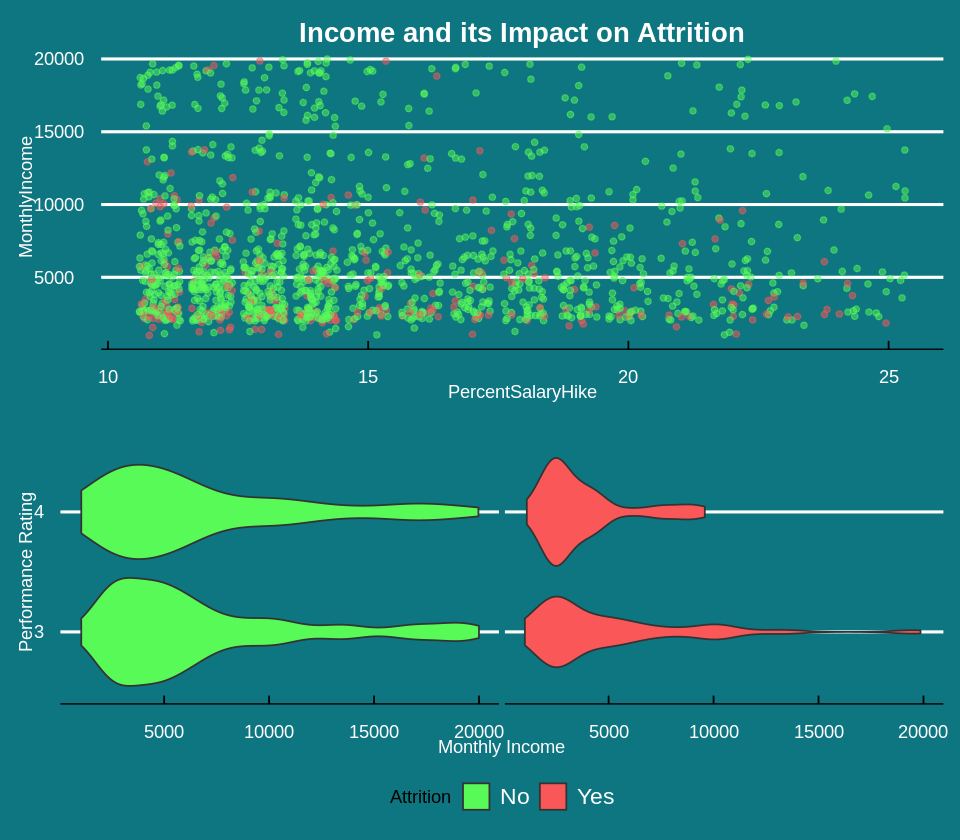

In [111]:
options(repr.plot.width=8, repr.plot.height=7)

per.sal <- df %>% select(Attrition, PercentSalaryHike, MonthlyIncome) %>%
ggplot(aes(x=PercentSalaryHike, y=MonthlyIncome)) + geom_jitter(aes(col=Attrition), alpha=0.5) +
theme_economist() + theme(legend.position="none") + scale_color_manual(values=c("#58FA58", "#FA5858")) +
labs(title="Income and its Impact on Attrition") + theme(plot.title=element_text(hjust=0.5, color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"))

perf.inc <- df %>% select(PerformanceRating, MonthlyIncome, Attrition) %>% group_by(factor(PerformanceRating), Attrition) %>%
ggplot(aes(x=factor(PerformanceRating), y=MonthlyIncome, fill=Attrition)) + geom_violin() + coord_flip() + facet_wrap(~Attrition) +
scale_fill_manual(values=c("#58FA58", "#FA5858")) + theme_economist() +
theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank(),
     plot.title=element_text(hjust=0.5, color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"),
     legend.text=element_text(color="white")) +
labs(x="Performance Rating",y="Monthly Income")


plot_grid(per.sal, perf.inc, nrow=2)

<h3><b>Average and Percent Difference of Daily Rates:</b> </h3>
<a id="pct_difference"></a>

Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”
Warning message:
“The `fun.ymin` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun.min` argument instead.”
Warning message:
“The `fun.ymax` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun.max` argument instead.”
Warning message in brewer.pal(9, "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


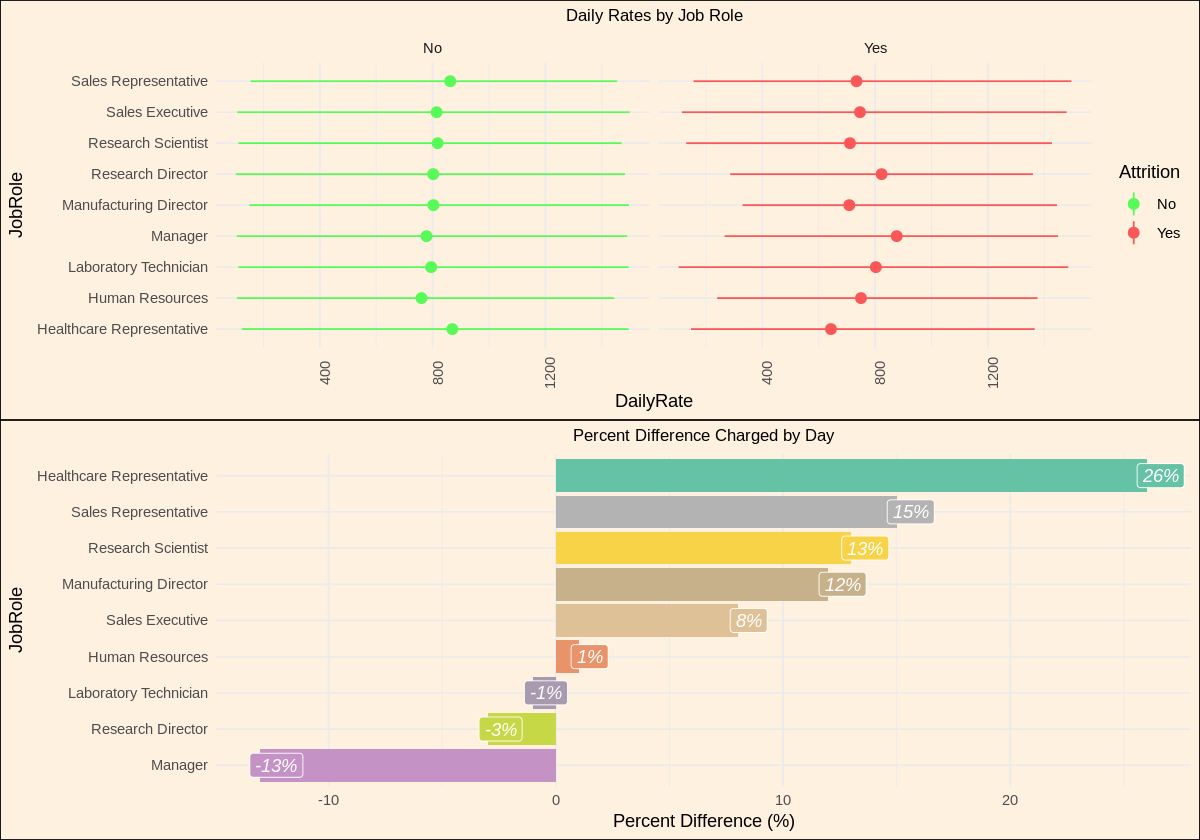

In [112]:
# daily rates by JobRole
options(repr.plot.width=10, repr.plot.height=7)

daily_r <- df %>% select(JobRole, Attrition, DailyRate) %>% group_by(Attrition, JobRole) %>%
ggplot(aes(x=JobRole, y=DailyRate, color=Attrition)) + facet_wrap(~Attrition) + coord_flip() + theme_minimal() +
theme(axis.text.x = element_text(angle = 90), plot.title=element_text(hjust=0.5, size=10), plot.background=element_rect(fill="#FFF1E0")) +
stat_summary(fun.y=mean, fun.ymin = min, fun.ymax = max) + scale_color_manual(values=c("#58FA58", "#FA5858")) +
labs(title="Daily Rates by Job Role")


# What's the difference between in Dailyrates by attrition and jobrole status.
attrition_daily <- df %>% select(JobRole, Attrition, DailyRate) %>% group_by(JobRole) %>% filter(Attrition == "Yes") %>%
summarize(avg_attrition=mean(DailyRate))


noattrition_daily <- df %>% select(JobRole, Attrition, DailyRate) %>% group_by(JobRole) %>% filter(Attrition == "No") %>%
summarize(avg_noattrition=mean(DailyRate))

# (No Attrition daily - Attrition Daily) / No Attrition Daily
colors <- c("#316D15C", "#16D12C", "#B2D116", "#FEBE5D", "#FE9F5D", "#F86E2E", "#F8532E", "#FA451D", "#FA1D1D")

combined_df <- merge(attrition_daily, noattrition_daily)
colourCount = length(unique(combined_df$JobRole))

percent_diff <- combined_df %>% mutate(pct_diff=round(((avg_noattrition - avg_attrition)/avg_noattrition),2) * 100) %>%
ggplot(aes(x=reorder(JobRole,pct_diff), y=pct_diff, fill=JobRole)) + geom_bar(stat="identity") + coord_flip() + theme_minimal() +
scale_fill_manual(values = colorRampPalette(brewer.pal(9, "Set2"))(colourCount)) +
theme(plot.title=element_text(hjust=0.5, size=10), plot.background=element_rect(fill="#FFF1E0"), legend.position="none") +
labs(x="JobRole", y="Percent Difference (%)", title="Percent Difference Charged by Day") +
geom_label(aes(label=paste0(pct_diff, "%")), colour = "white", fontface = "italic", hjust=0.2)

plot_grid(daily_r, percent_diff, nrow=2)

<h3><b>Level of Attrition by Overtime Status:</b> </h3>
<a id="overtime_attrition"></a>

In [113]:
df %>% select(OverTime, Attrition) %>% filter(Attrition == "Yes") %>% group_by(Attrition, OverTime) %>%
summarize(n=n()) %>% mutate(pct=round(prop.table(n),2) * 100)

`summarise()` has grouped output by 'Attrition'. You can override using the
`.groups` argument.


Attrition,OverTime,n,pct
<chr>,<chr>,<int>,<dbl>
Yes,No,110,46
Yes,Yes,127,54


`summarise()` has grouped output by 'Attrition'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Attrition'. You can override using the
`.groups` argument.


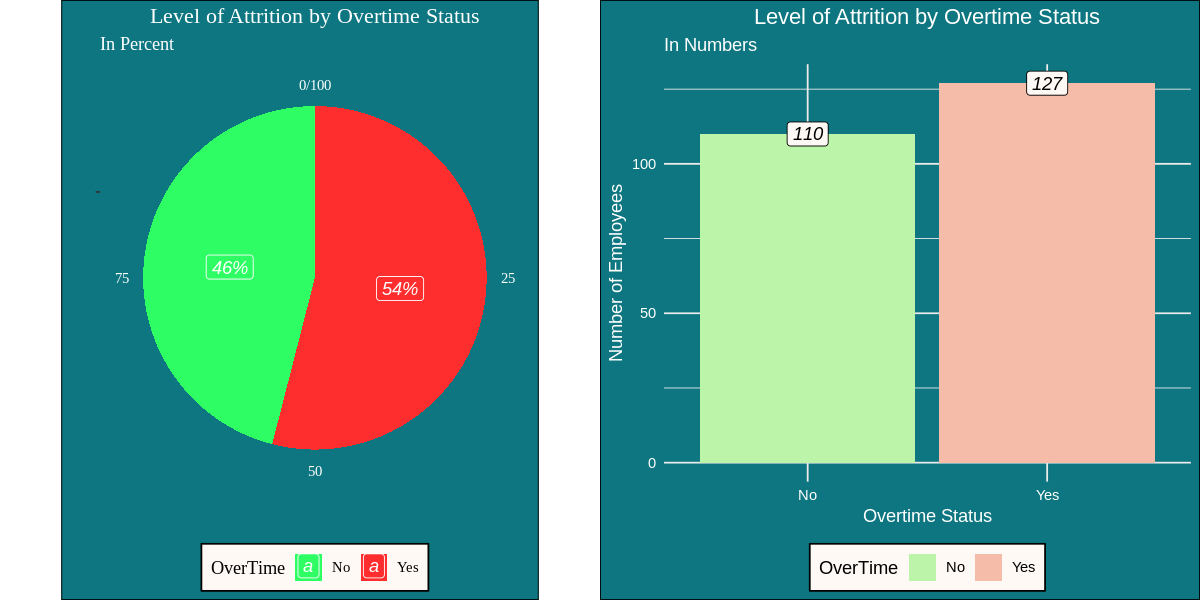

In [114]:
options(repr.plot.width=10, repr.plot.height=5)


overtime_percent <- df %>% select(OverTime, Attrition) %>% filter(Attrition == "Yes") %>% group_by(Attrition, OverTime) %>%
summarize(n=n()) %>% mutate(pct=round(prop.table(n),2) * 100) %>%
ggplot(aes(x="", y=pct, fill=OverTime)) +
geom_bar(width = 1, stat = "identity") + coord_polar("y", start=0) +
theme_tufte() + scale_fill_manual(values=c("#2EFE64", "#FE2E2E")) +
geom_label(aes(label = paste0(pct, "%")), position = position_stack(vjust = 0.5), colour = "white",  fontface = "italic")+
theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank(),
     plot.title=element_text(hjust=0.5, color="white"), plot.subtitle=element_text(color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"),
      legend.background = element_rect(fill="#FFF9F5",
                                       size=0.5, linetype="solid", colour ="black")) +
labs(title="Level of Attrition by Overtime Status", subtitle="In Percent", x="", y="")


overtime_number <- df %>% select(OverTime, Attrition) %>% filter(Attrition == "Yes") %>% group_by(Attrition, OverTime) %>%
summarize(n=n()) %>% mutate(pct=round(prop.table(n),2) * 100) %>%
ggplot(aes(x=OverTime, y=n, fill=OverTime)) + geom_bar(stat="identity") + scale_fill_manual(values=c("#BCF5A9", "#F5BCA9")) +
geom_label(aes(label=paste0(n)), fill="#FFF9F5", colour = "black", fontface = "italic") +
labs(title="Level of Attrition by Overtime Status", subtitle="In Numbers", x="Overtime Status", y="Number of Employees") + theme_minimal() +
theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank(),
     plot.title=element_text(hjust=0.5, color="white"), plot.subtitle=element_text(color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"),
     legend.background = element_rect(fill="#FFF9F5",
                                  size=0.5, linetype="solid",
                                  colour ="black"))





plot_grid(overtime_percent, overtime_number)

<h2> Working Environment </h2>
In this section, we will explore everything that is related to the working environment and the structure of the organization.

<h3> Questions to ask Ourselves </h3>
<ul>
    <li><b>Job Roles: </b> How many employees in each Job Role? </li>
    <li><b>Salary by Job Role: </b> What's the average salary by job role?</li>
    <li><b>Attrition by Job Role: </b> What's the attrition percentage by job role? Which job role has the highest attrition rate? Which has the lowest? </li>
    <li><b> Years with Current Manager </b> What's the average satisfaction rate by the status of the manager? Are recently hired managers providinga higher job satisfaction to employees?  </li>
    <li><b>Working Environment by Job Role: </b> What's the working environment by job role? </li>
</ul><br>


<h3> Summary: </h3>
<ul>
    <li><b>Number of Employees by Job Role: </b> <b>Sales </b> and <b> Research Scientist </b> are the job positions with the highest number of employees. </li>
    <li><b>Salary by Job Role: </b> <b>Managers</b> and <b>Research Directors</b> have the highest salary on average. </li>
    <li><b>Attrition by Job Role: </b> <b>Sales Representatives</b>, <b>HealthCare Representatives </b> and <b>Managers</b> have the highest attrition rates. This could give us a hint that in these departments we are experiencing certain issues with employees. </li>
    <li><b>Managers: </b>Employees that are dealing with <b>recently hired managers</b> have a <b>lower satisfaction score</b> than managers that have been there for a longer time. </li>
    <li><b>Working Environment: </b> As expected, <b>managers</b> and <b>healthcare representatives</b> are dealing with a lower working environment however, we don't see the same with sales representatives that could be because most sales representatives work outside the organization.</li>
    </ul>

<h3><b> Number of Employees by Job Role </b></h3>
<a id="number_jobrole"></a>

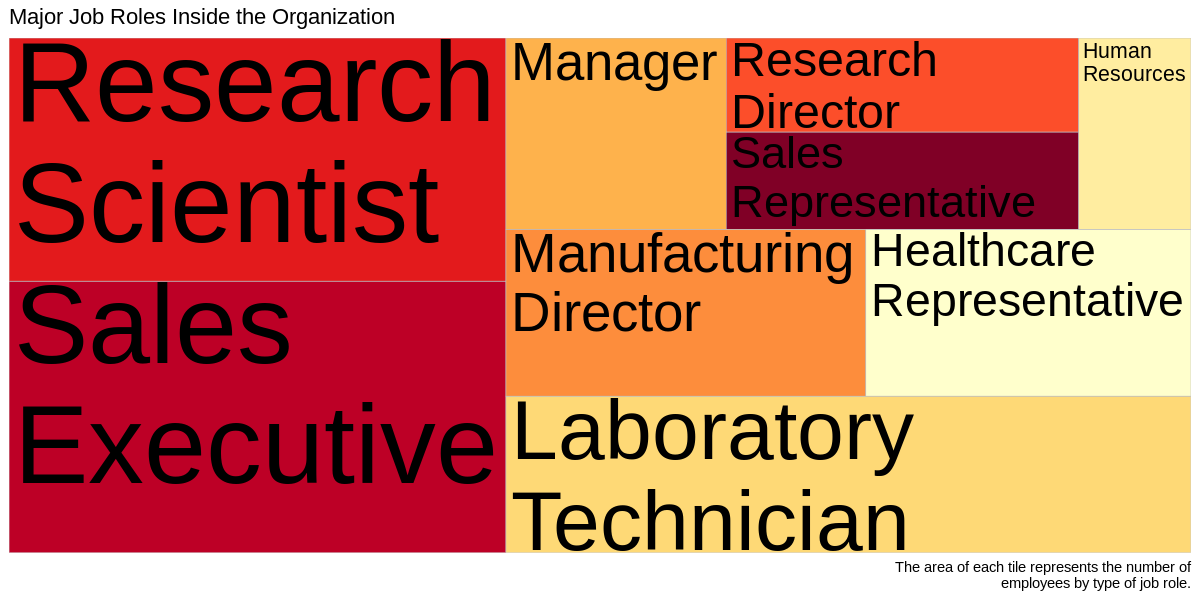

In [115]:
# Create a TreeMap with the number of Employees by JobRole
library(tree)
role.amount <- df %>% select(JobRole) %>% group_by(JobRole) %>% summarize(amount=n()) %>%
ggplot(aes(area=amount, fill=JobRole, label=JobRole)) +  geom_treemap() +
  geom_treemap_text(grow = T, reflow = T, colour = "black") +
  scale_fill_brewer(palette = "YlOrRd") +
  theme(legend.position = "none") +
  labs(
    title = "Major Job Roles Inside the Organization",
    caption = "The area of each tile represents the number of
employees by type of job role.",
    fill = "JobRole"
  )

role.amount

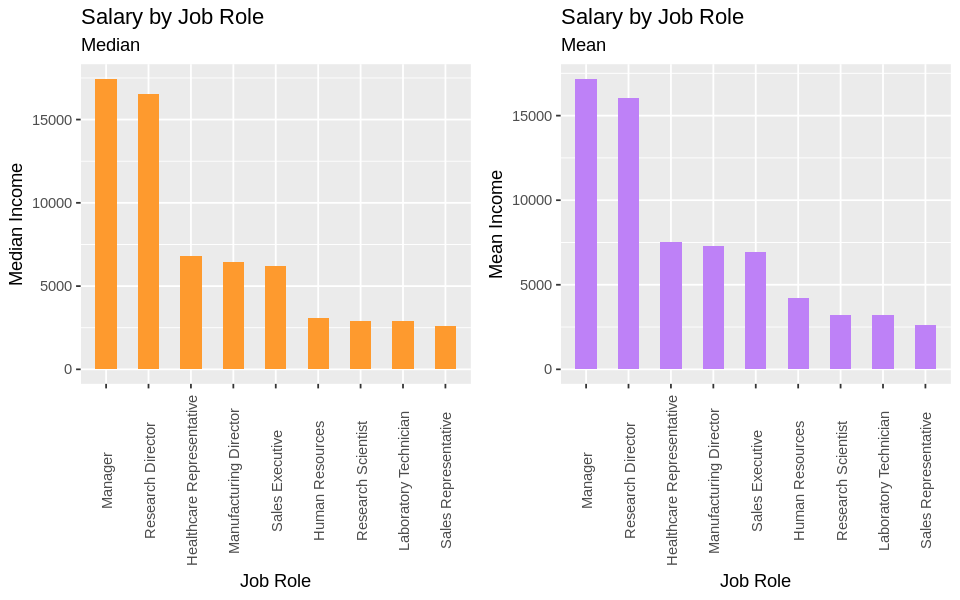

In [116]:
# Median Salary by JobRole
# Highest percentage of attrition by JobRole
options(repr.plot.width=8, repr.plot.height=5)

# Median Salary
job.sal <- df %>% select(JobRole, MonthlyIncome) %>% group_by(JobRole) %>% summarize(med=median(MonthlyIncome), avg=mean(MonthlyIncome))


p1 <- ggplot(job.sal, aes(x=reorder(JobRole,-med), y=med)) +  geom_bar(stat="identity", width=.5, fill="#FE9A2E") +
  labs(title="Salary by Job Role",
       subtitle="Median",
      x="Job Role",
      y="Median Income") +
  theme(axis.text.x = element_text(angle=90, vjust=0.6))


p2 <- ggplot(job.sal, aes(x=reorder(JobRole,-avg), y=avg)) +  geom_bar(stat="identity", width=.5, fill="#BE81F7") +
  labs(title="Salary by Job Role",
       subtitle="Mean",
      x="Job Role",
      y="Mean Income") +
  theme(axis.text.x = element_text(angle=90, vjust=0.6))


plot_grid(p1, p2, ncol=2)

<h3><b>Attrition by Job Role </b></h3>
<a id="attrition_role"></a>

`summarise()` has grouped output by 'JobRole'. You can override using the
`.groups` argument.


98 98 


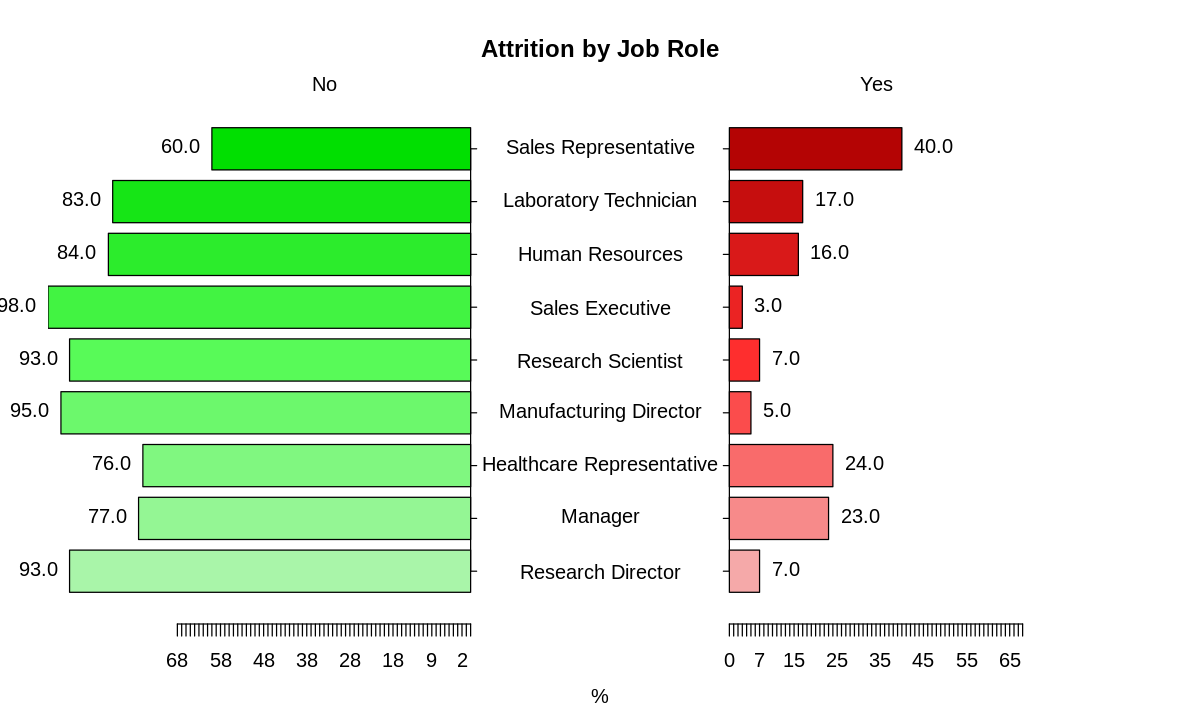

In [117]:
# The Funnel with the Attrition Rates by Job Role
options(repr.plot.width=10, repr.plot.height=6)
attr.job <- df %>% select(JobRole, Attrition) %>% group_by(JobRole, Attrition) %>% summarize(amount=n()) %>%
mutate(pct=round(prop.table(amount),2) * 100) %>% arrange(pct)

nofunc <- colorRampPalette(c("#A9F5A9", "#58FA58", "#01DF01"))
yesfunc <- colorRampPalette(c("#F5A9A9", "#FE2E2E", "#B40404"))

yes.attr <- attr.job %>% filter(Attrition == "Yes") %>% arrange(JobRole)
no.attr <- attr.job %>% filter(Attrition == "No") %>% arrange(JobRole)

par(mar = pyramid.plot(no.attr$pct, yes.attr$pct, labels = unique(attr.job$JobRole),
                       top.labels=c("No","","Yes"), main = "Attrition by Job Role",
                       gap=30, show.values = T, rxcol = yesfunc(9), lxcol = nofunc(9)))

<h3> <b>Current Managers and Average Satisfaction Score:</b> </h3>
<a id="current_managers"></a>

`summarise()` has grouped output by 'CatYearsManager'. You can override using
the `.groups` argument.
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


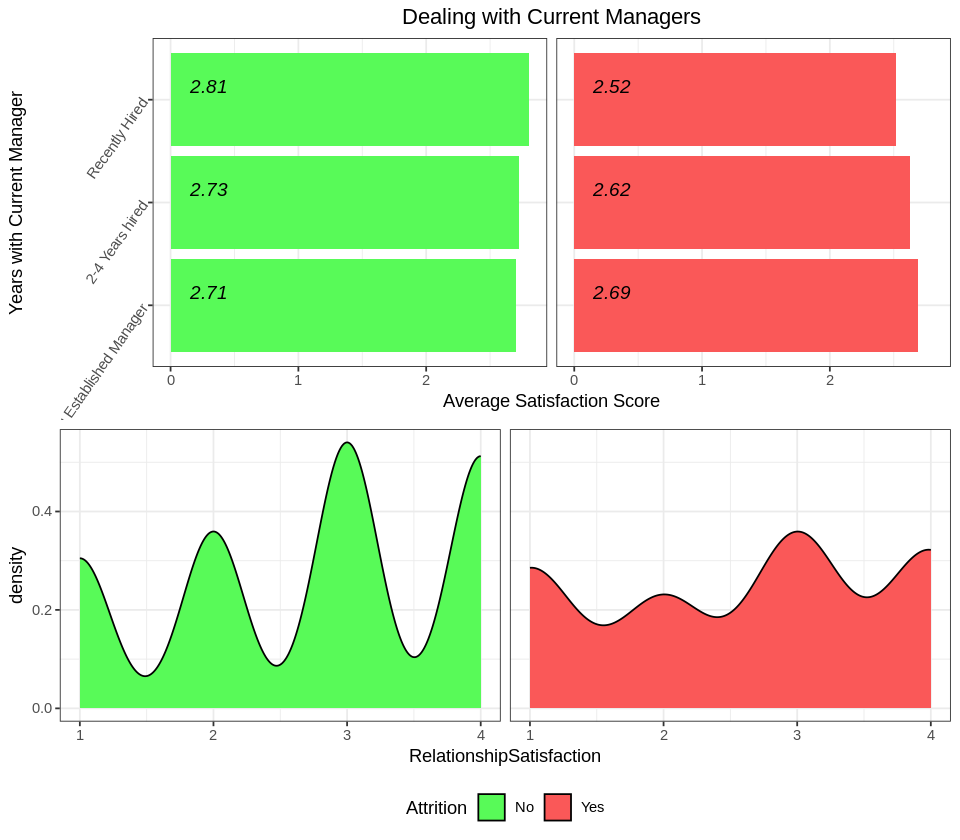

In [118]:
# Create a Categorical Value for Years with Current Manager
# Create a Categorical Value for RelationShip Satisfaction (We will use facet_wrap here)
# Then we will use income as our Y-Axis
options(repr.plot.width=8, repr.plot.height=7)

df$CatYearsManager <- ifelse(df$YearsWithCurrManager <= 1, "Recently Hired",
                            ifelse(df$YearsWithCurrManager > 1 & df$YearsWithCurrManager <= 4, "2-4 Years hired", "Long Established Manager"))


# Determine what is the Average Relationship Satisfaction with the Recently Hired Managers
rel.sat <- df %>% select(CatYearsManager, RelationshipSatisfaction, Attrition) %>% group_by(CatYearsManager, Attrition) %>%
summarize(avg.sat=mean(RelationshipSatisfaction)) %>%
ggplot(aes(x=fct_reorder(CatYearsManager,-avg.sat), y=avg.sat, fill=Attrition)) + geom_bar(stat="identity", position="dodge") + facet_wrap(~Attrition) +
geom_text(aes(x=CatYearsManager, y=0, label= paste0(round(avg.sat,2))),
            hjust=-0.5, vjust=-0.5, size=4,
            colour="black", fontface="italic",
         angle=360) + coord_flip() + theme_bw() +
theme(legend.position="none", strip.background = element_blank(), strip.text.x = element_blank(), plot.title=element_text(hjust=0.5),
     axis.text.y = element_text(angle = 55)) +
labs(x="Years with Current Manager",y="Average Satisfaction Score", title="Dealing with Current Managers") +
scale_fill_manual(values=c("#58FA58", "#FA5858"))


# Create a Distribution by Attrition of the RelationShip Satisfaction
rel.dist <- df %>% select(RelationshipSatisfaction, Attrition) %>% group_by(Attrition) %>%
ggplot(aes(x=RelationshipSatisfaction, y=..density..)) + geom_density(aes(fill=Attrition)) + facet_wrap(~Attrition) +
theme_bw() + theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank()) +
scale_fill_manual(values=c("#58FA58", "#FA5858"))


plot_grid(rel.sat, rel.dist, nrow=2)

<h3><b>Average Environment Satisfaction:</b> </h3>
<a id="average_environment"></a>

`summarise()` has grouped output by 'JobRole'. You can override using the
`.groups` argument.


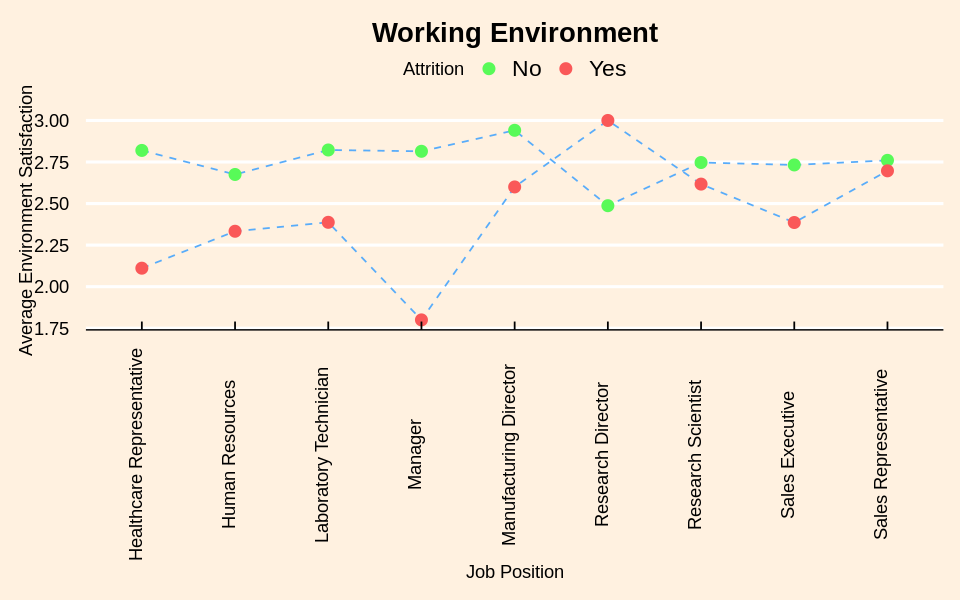

In [119]:
# Environment Satisfaction let's use the changes by JobRole
options(repr.plot.width=8, repr.plot.height=5)

env.attr <- df %>% select(EnvironmentSatisfaction, JobRole, Attrition) %>% group_by(JobRole, Attrition) %>%
summarize(avg.env=mean(EnvironmentSatisfaction))

ggplot(env.attr, aes(x=JobRole, y=avg.env)) + geom_line(aes(group=Attrition), color="#58ACFA", linetype="dashed") +
geom_point(aes(color=Attrition), size=3) +  theme_economist() + theme(plot.title=element_text(hjust=0.5), axis.text.x=element_text(angle=90),
                                                                     plot.background=element_rect(fill="#FFF1E0")) +
labs(title="Working Environment", y="Average Environment Satisfaction", x="Job Position") + scale_color_manual(values=c("#58FA58", "#FA5858"))

<h2><b>An In-Depth Look into Attrition:</b></h2>
<h3><b>Digging into Attrition:</b> </h3>
<a id="digging_attrition"></a>
In this section, we will go as deep as we can into employees that quit to have a better understanding what were some of the reasons that employees decided to leave the organization.

<h3> Questions to Ask Ourselves: </h3>
<ul>
    <li><b>Attrition by Department: </b>How many employees quit by Department? Did they have a proper work-life balance?</li>
    <li><b>Distance from Work:</b> Is distance from work a huge factor in terms of quitting the organization? </li>
    </ul>

`summarise()` has grouped output by 'Department'. You can override using the
`.groups` argument.


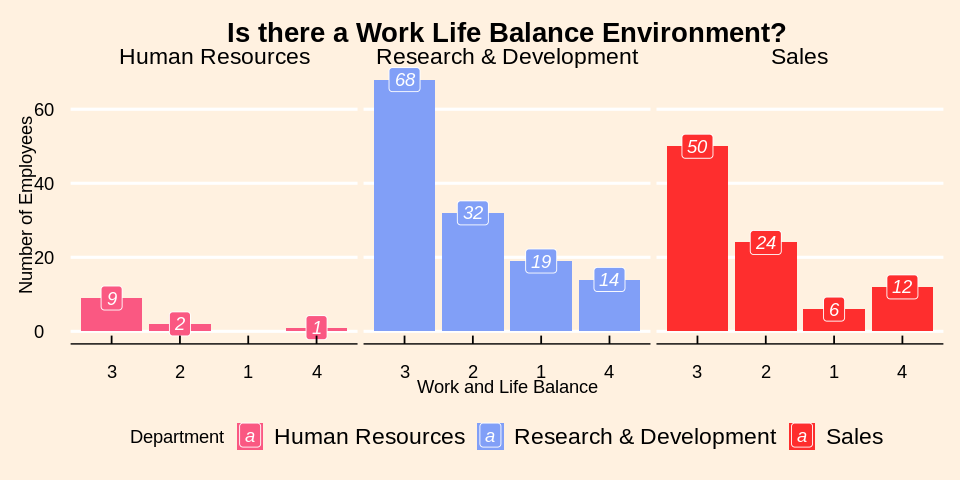

In [120]:
options(repr.plot.width=8, repr.plot.height=4)

attritions <- df %>% filter(Attrition == "Yes")

attritions$WorkLifeBalance <- as.factor(attritions$WorkLifeBalance)

by.department <- attritions %>% select(Department, WorkLifeBalance) %>% group_by(Department, WorkLifeBalance) %>%
summarize(count=n()) %>%
ggplot(aes(x=fct_reorder(WorkLifeBalance, -count), y=count, fill=Department)) + geom_bar(stat='identity') + facet_wrap(~Department) +
theme_economist() + theme(legend.position="bottom", plot.title=element_text(hjust=0.5), plot.background=element_rect(fill="#FFF1E0")) +
scale_fill_manual(values=c("#FA5882", "#819FF7", "#FE2E2E")) +
geom_label(aes(label=count, fill = Department), colour = "white", fontface = "italic") +
labs(title="Is there a Work Life Balance Environment?", x="Work and Life Balance", y="Number of Employees")

by.department

In [121]:
# Digging into Research and Development
r.d <- df %>% select(Department, WorkLifeBalance, Attrition) %>%
filter(Department == "Research & Development" & WorkLifeBalance == 1 | WorkLifeBalance == 2) %>%
group_by(Attrition) %>% summarize(count=n())

<h3><b>Other Factors that could Influence Attrition:</b> </h3>
<a id="other_factors"></a>
In this section we will analyze other external factors that could have a possible influence on individuals leaving the organization. <br>
Some of the factors include:
<ul>
    <li><i> Home Distance from Work</i> </li>
    <li><i> Business Travel </i></li>
    <li><i>Marital Status</i> </li>
    <li><i>Stock Option Levels </i> </li>
    </ul>
    
**    We will further analyze this section there is lots to do.**

In [122]:
# Determine the average distance of people who did not quit the organization.
# Then use this number as an anchor to create a column for the employees that quit.
# Let's see what number of employees that quit are above the average distance of employees that didn't quit.
options(repr.plot.width=8, repr.plot.height=4)

no.attritions <- df %>% filter(Attrition == "No")

# Average distance of employees that didn't quit.
med.distance <- no.attritions %>% select(DistanceFromHome) %>% summarize(med.dist=round(median(DistanceFromHome), 2))

attritions$Median_Distance <- ifelse(attritions$DistanceFromHome < 7, "Below Average", "Above Average")

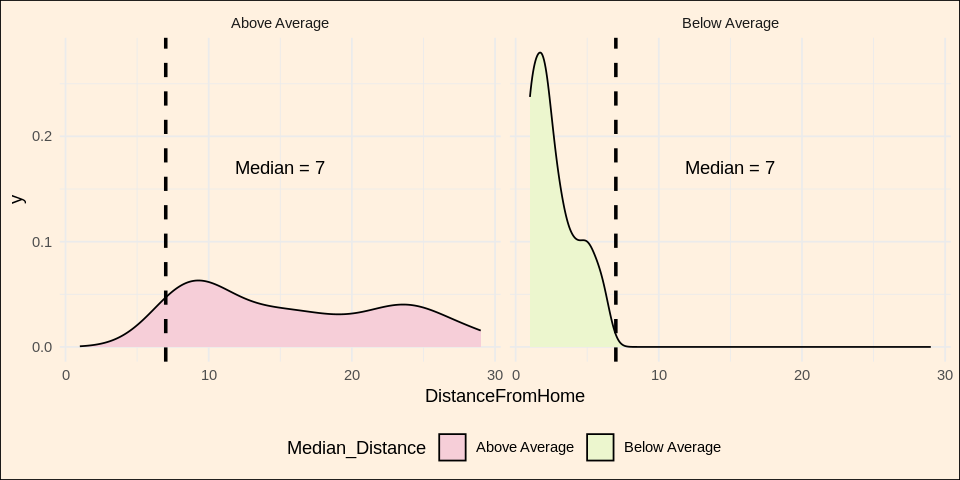

In [123]:
# Distribution of both Distance from Work Status
dist <- attritions %>% select(Median_Distance, DistanceFromHome) %>%
ggplot(aes(x=DistanceFromHome, fill=Median_Distance)) + geom_density() + facet_wrap(~Median_Distance) + theme_minimal() +
scale_color_manual(values=c("#2EFE64", "#FA5858")) + scale_fill_manual(values=c("#F6CED8", "#ECF6CE")) +
theme(legend.position="bottom", plot.background=element_rect(fill="#FFF1E0")) +
geom_vline(aes(xintercept=7),
            color="black", linetype="dashed", size=1) +
annotate("text", label = "Median = 7", x = 15, y = 0.17, color = "black")

dist

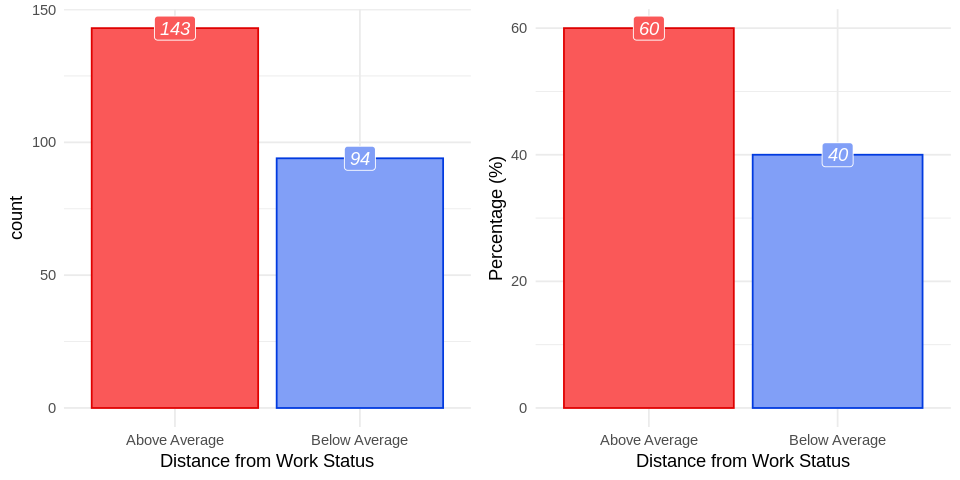

In [124]:
p1 <- attritions %>% select(Median_Distance) %>% group_by(Median_Distance) %>% summarize(count=n()) %>%
ggplot(aes(x=Median_Distance, y=count, color=Median_Distance, fill=Median_Distance)) + geom_bar(stat="identity", position="dodge") +  theme_minimal() +
theme(legend.position="none") + scale_fill_manual(values=c("#FA5858", "#819FF7")) +
geom_label(aes(label=count, fill = Median_Distance), colour = "white", fontface = "italic") +
scale_color_manual(values=c("#DF0101", "#013ADF")) + labs(x="Distance from Work Status")

p2 <- attritions %>% select(Median_Distance) %>% group_by(Median_Distance) %>% summarize(count=n()) %>%
mutate(pct=round(prop.table(count),2) * 100) %>%
ggplot(aes(x=Median_Distance, y=pct, color=Median_Distance, fill=Median_Distance)) + geom_bar(stat="identity") + theme_minimal() +
theme(legend.position="none") +
geom_label(aes(label=pct, fill = Median_Distance), colour = "white", fontface = "italic")  + scale_fill_manual(values=c("#FA5858", "#819FF7")) +
scale_color_manual(values=c("#DF0101", "#013ADF")) + labs(x="Distance from Work Status", y="Percentage (%)")

plot_grid(p1, p2, ncol=2)

`summarise()` has grouped output by 'StockOptionLevel'. You can override using
the `.groups` argument.


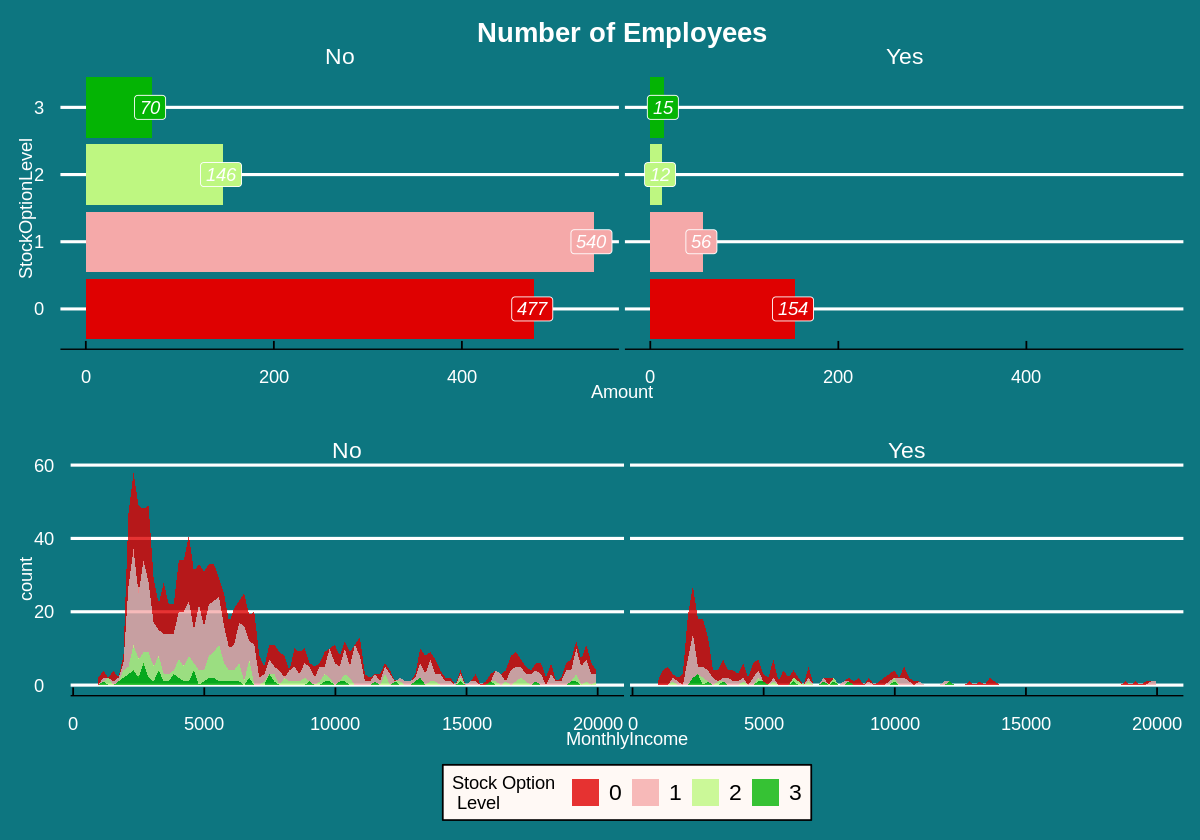

In [125]:
# Let's see what the Average MonthlyIncome is for those who have stockoptionlevels and for those who don't.
# First let's see how many employees have Stockoption levels.
options(repr.plot.width=10, repr.plot.height=7)

stockoption <- df %>% select(StockOptionLevel, Attrition) %>% group_by(StockOptionLevel, Attrition) %>% summarize(n=n())  %>%
ggplot(aes(x=reorder(StockOptionLevel, -n), y=n, fill=factor(StockOptionLevel))) + geom_bar(stat="identity") + coord_flip() +
facet_wrap(~Attrition) + theme_economist() + scale_fill_manual(values=c("#DF0101", "#F5A9A9", "#BEF781", "#04B404")) +
guides(fill=guide_legend(title="Stock Option \n Level")) +
theme(legend.position="none", plot.background=element_rect(fill="#0D7680"), plot.title=element_text(hjust=0.5, color="white"),
     axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"),
     strip.text.x = element_text(color="white"),
     legend.text=element_text(color="white"))  +
geom_label(aes(label=n, fill = factor(StockOptionLevel)), colour = "white", fontface = "italic", hjust=0.55) +
labs(title="Number of Employees", x="StockOptionLevel", y="Amount")

# Average income by StockOption using the geom_line()
income_stockoption <- df %>% select(StockOptionLevel, MonthlyIncome, Attrition) %>% group_by(StockOptionLevel, Attrition) %>%
ggplot(aes(x=MonthlyIncome)) + geom_area(aes(fill=factor(StockOptionLevel)), stat ="bin", bins=100, alpha=0.8) + facet_wrap(~Attrition) +
theme_economist() +   scale_fill_manual(values=c("#DF0101", "#F5A9A9", "#BEF781", "#04B404")) +
guides(fill=guide_legend(title="Stock Option \n Level")) +
theme(legend.position="bottom", plot.background=element_rect(fill="#0D7680"), plot.title=element_text(hjust=0.5, color="white"),
     axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"),
     strip.text.x = element_text(color="white"),
     legend.text=element_text(color="black"),
     legend.background = element_rect(fill="#FFF9F5",
                                  size=0.5, linetype="solid",
                                  colour ="black"))


plot_grid(stockoption, income_stockoption, nrow=2)

`summarise()` has grouped output by 'Attrition'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Attrition'. You can override using the
`.groups` argument.


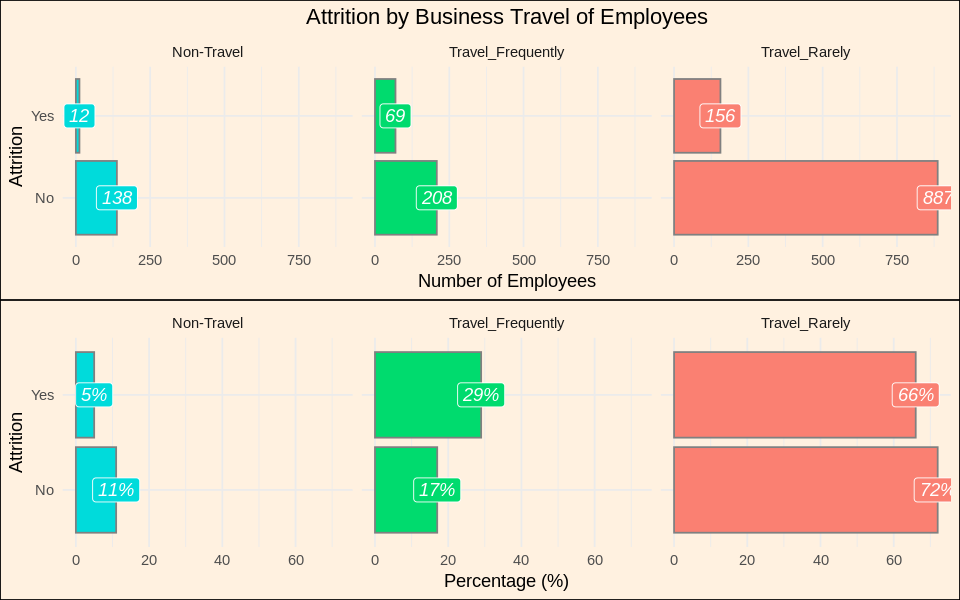

In [126]:
options(repr.plot.width=8, repr.plot.height=5)


# Percent Attrition by Work Life Balance
work_bal_cnt <- df %>% select(Attrition, BusinessTravel, WorkLifeBalance) %>% group_by(Attrition, BusinessTravel) %>%
summarize(count=n()) %>% mutate(pct=round(prop.table(count),2) * 100) %>%
ggplot(aes(x=Attrition, y=count, fill=BusinessTravel, color=Attrition)) + geom_bar(stat='identity') + facet_wrap(~BusinessTravel) +
geom_label(aes(label=count, fill = BusinessTravel), colour = "white", fontface = "italic")  + theme_minimal() + theme(legend.position="none") +
scale_fill_manual(values=c("#00dbdb", "#00db6e", "#fa8072")) +
scale_color_manual(values=c("#808080", "#808080")) + labs(title="Attrition by Business Travel of Employees",
                                                          x="Attrition", y="Number of Employees") + coord_flip() +
theme(plot.title=element_text(hjust=0.5), plot.background=element_rect(fill="#FFF1E0"))



work_bal_pct <- df %>% select(Attrition, BusinessTravel, WorkLifeBalance) %>% group_by(Attrition, BusinessTravel) %>%
summarize(count=n()) %>% mutate(pct=round(prop.table(count),2) * 100) %>%
ggplot(aes(x=Attrition, y=pct, fill=BusinessTravel, color=Attrition)) + geom_bar(stat='identity') + facet_wrap(~BusinessTravel) + theme_minimal() +
theme(legend.position="none") +
geom_label(aes(label=paste0(pct, "%"), fill = BusinessTravel), colour = "white", fontface = "italic")  +
scale_fill_manual(values=c("#00dbdb", "#00db6e", "#fa8072")) +
scale_color_manual(values=c("#808080", "#808080")) + labs(x="Attrition", y="Percentage (%)") + coord_flip() +
theme(plot.background=element_rect(fill="#FFF1E0"))

plot_grid(work_bal_cnt, work_bal_pct, nrow=2)

In [127]:
# JobSatisfaction as integer again.
df$JobSatisfaction <- as.integer(df$JobSatisfaction)

<h2>Correlations and Bi-variate Analysis: </h2>
<h3>Correlation Matrix:  </h3>
<a id="correlation_matrix"></a>
In this section we will understand what features have a positive correlation with each other. This tells us whether there is an association between two variables. What I like about the correlation section is that it gives us a better understanding of some of the features we are dealing with.


<h3> Summary: </h3>
<ul>
    <li>The higher the<b> total working years </b>the higher the <b>monthly income</b> of an employee. </li>
    <li>The higher the <b>percent salary hike</b> the higher the <b>performance rating</b>. </li>
        <li>The higher the <b>years with current manager</b> the higher the <b>years since last promotion</b>. </li>
        <li>The higher the <b>age</b> the higher the<b> monthly income</b>. </li>
</ul>

Warning message in stats::cor(x, ...):
“the standard deviation is zero”


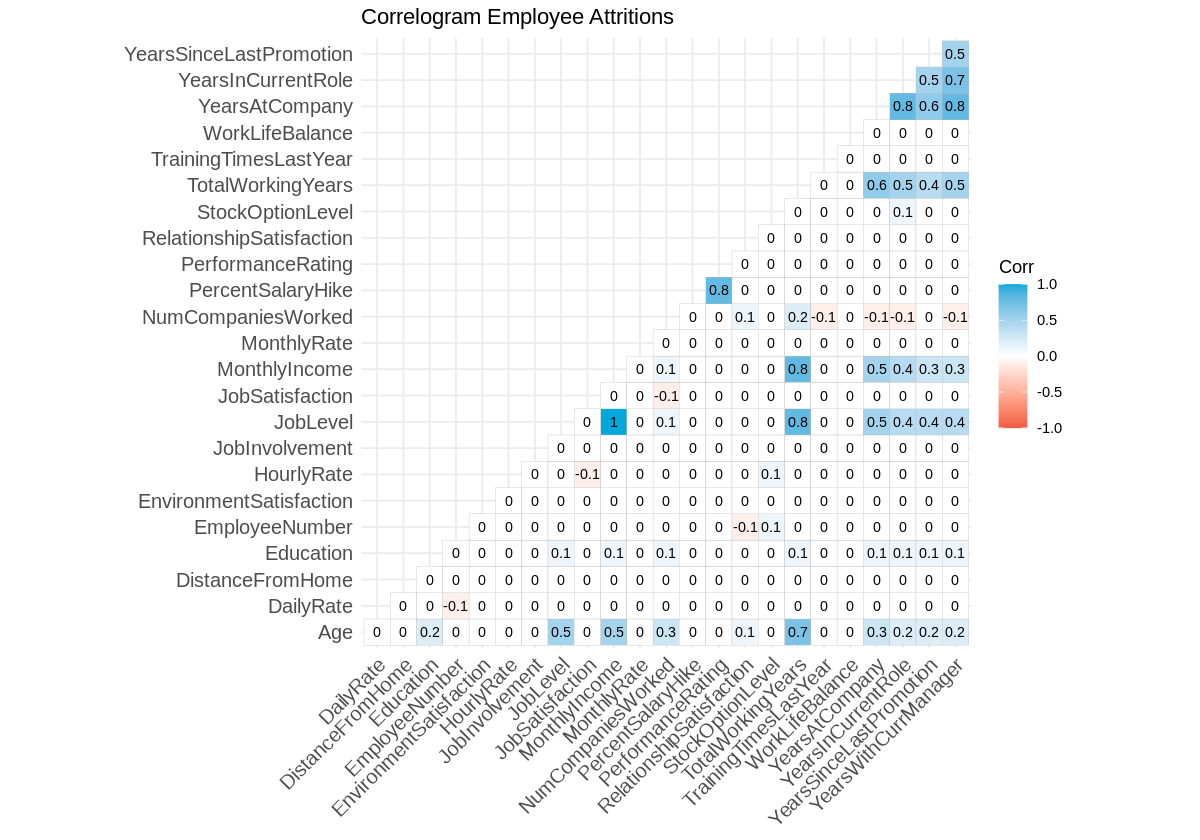

In [128]:
# # Let's have a better understanding about each feature through a correlation plot
options(repr.plot.width=10, repr.plot.height=7)

nums <- select_if(df, is.numeric)

corr <- round(cor(nums), 1)

ggcorrplot(corr,
           type = "lower",
           lab = TRUE,
           lab_size = 3,
           method="square",
           colors = c("tomato2", "white", "#01A9DB"),
           title="Correlogram Employee Attritions",
           ggtheme=theme_minimal())

<h3> <b> Bi-Variate Analysis: </b> </h3>

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


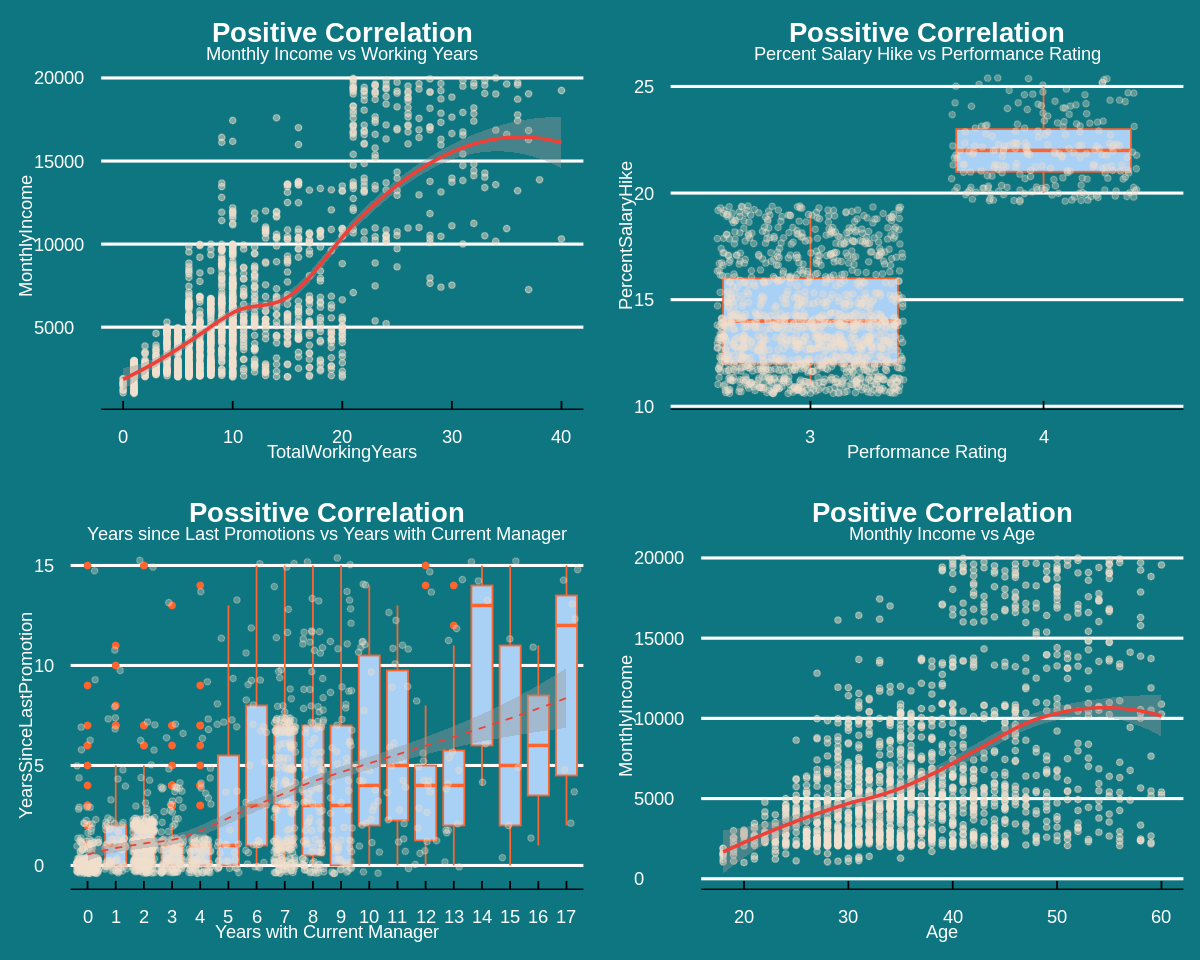

In [129]:
options(repr.plot.width=10, repr.plot.height=8)

# Positive Correlations
p1 <- df %>% select(TotalWorkingYears, MonthlyIncome) %>%
ggplot(aes(x=TotalWorkingYears, y=MonthlyIncome)) + geom_point(colour = "#F2DFCE", alpha=1/2) + geom_smooth(method="loess",color="#EE4037") +
theme_economist() + theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank(),
     plot.title=element_text(hjust=0.5, color="white"), plot.subtitle=element_text(hjust=0.5, color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white")) +
labs(title="Positive Correlation", subtitle="Monthly Income vs Working Years")

p2 <-  df %>% select(PerformanceRating, PercentSalaryHike) %>%
ggplot(aes(x=factor(PerformanceRating), y=PercentSalaryHike)) + geom_boxplot(colour = "#FE642E", fill="#A9D0F5") +
geom_jitter(color="#F2DFCE",alpha=1/3)  +
theme_economist() + theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank(),
     plot.title=element_text(hjust=0.5, color="white"), plot.subtitle=element_text(hjust=0.5, color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white")) +
labs(title="Possitive Correlation", subtitle="Percent Salary Hike vs Performance Rating", x="Performance Rating")

# Years with Current Manager, Years since Last Promotion
p3 <-  df %>% select(YearsWithCurrManager, YearsSinceLastPromotion) %>%
ggplot(aes(x=factor(YearsWithCurrManager), y=YearsSinceLastPromotion)) + geom_boxplot(colour = "#FE642E", fill="#A9D0F5") +
geom_jitter(color="#F2DFCE",alpha=1/3) + geom_smooth(method='loess',aes(group=1),color='#EE4037',lty=2,size=.5) +
theme_economist() + theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank(),
     plot.title=element_text(hjust=0.5, color="white"),plot.subtitle=element_text(hjust=0.5, color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white")) +
labs(title="Possitive Correlation", subtitle="Years since Last Promotions vs Years with Current Manager", x="Years with Current Manager")

# Age and Monthly Income
p4 <-  df %>% select(Age, MonthlyIncome) %>%
ggplot(aes(x=Age, y=MonthlyIncome)) + geom_point(colour = "#F2DFCE", alpha=1/2) + geom_smooth(method="loess", color="#EE4037") +
theme_economist() + theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank(),
     plot.title=element_text(hjust=0.5, color="white"), plot.subtitle=element_text(hjust=0.5, color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white")) +
labs(title="Positive Correlation", subtitle="Monthly Income vs Age")

plot_grid(p1, p2, p3,p4, ncol=2, nrow=2)

**Note from the author**: I'm still getting used to the preprocessing steps of both numerical and categorical variables howver, coming from a Python background it will take me a bit more time to decipher. Nevertheless, more updates will come soon. I'm also thinking to add some more to the exploratory data analysis.

<h2>Splitting the Data</h2>

In [130]:
set.seed(142)
# # I personally prefer to shuffle my data before splitting.
original_df <- original_df[sample(nrow(original_df)),]

# Let's encode the ordinal variables
original_df$BusinessTravel = factor(original_df$BusinessTravel,
                         levels = c('Travel_Frequently', 'Travel_Rarely', 'Non-Travel'),
                         labels = c(1, 2, 3))



# Changing the datatype from integer to factors from the ordinal variables.
cols <- c("Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel",
         "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction",
         "StockOptionLevel", "TrainingTimesLastYear", "WorkLifeBalance")

original_df[cols] <- lapply(original_df[cols], factor)

# Delete unecessary columns
cols <- c("Over18", "EmployeeNumber", "EmployeeCount")

original_df[cols] <- NULL


# Splitting our data
trainIndex <- createDataPartition(original_df$Attrition, p=0.8,
                                 list=FALSE, times=1)

train <- original_df[trainIndex,]
test <- original_df[-trainIndex,]



# Checking that both the training and testing sets have the same label proportions.
prop_train <- train %>% select(Attrition) %>% group_by(Attrition) %>% summarize(n=n()) %>%
mutate(pct=round(prop.table(n), 2))

prop_test <- test %>% select(Attrition) %>% group_by(Attrition) %>% summarize(n=n()) %>%
mutate(pct=round(prop.table(n), 2))

prop_train
prop_test

Attrition,n,pct
<chr>,<int>,<dbl>
No,987,0.84
Yes,190,0.16


Attrition,n,pct
<chr>,<int>,<dbl>
No,246,0.84
Yes,47,0.16


In [131]:
# dmy <- dummyVars("~.", data=original_df)
# new <- data.frame(predict(dmy, newdata=original_df,
#                          levelsOnly=True))
# pcaObject <- prcomp(new,
#                     center = TRUE, scale. = TRUE)



In [132]:
# Split into the features and labels so X_train and y_train
# X_train <- train[,-2]
# y_train <- train["Attrition"]

# # Splitting the Testing sets into features and label
# X_test <- test[,-2]
# y_test <- test["Attrition"]

<b> Note: </b> I am aware the dataset is slightly imbalanced which could make our DecisionTree to make wrongly assumptions. I will work on a oversampling technique further in the future to deal with this problem.

<h3><b> Starting with Decision Trees: </b> </h3>
<a id="decision"></a>
<b> Terms to Know: </b>
<ul>
    <li><b>Gene Impurity: </b> If all the training instances belong to the same class the impurity of a specific node will be equivalent to zero. For instance, let's assume that all employee who had a WorkLifeBalance $<$ 2, decided to leave the organization. In this case the impurity will also be zero. </li>
    <li><b>Calculating Impurity: </b> <br><br>$\large G_i = 1 -\displaystyle \sum_{k=1}^n p_1,k^2$ <br>
        <b>where: </b><br>
    p,i,k is the ratio of class k instances in the ith node.</li>
    <li><b>Classification and Regression Tree (CART) algorithm:</b> The main idea of this concept is to split the training set into two smaller subsets and create a conditional statement using one feature. (For instance, MonthlyIncome $<$ 25k). How does the algorithm determines the conditional statement? It looks for the conditional statement that creates the <b>"purest"</b> subset  (remember impurity = 0 or in this case the lowest impurity).  </li>
    <li><b> Formula of the CART Training Algorithm (Finding our threshold for each feature): </b><br><br>
    $\large J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$<br>
    <b>where:</b><br>
    $G_{left/right}$ = determines the impurity of both subsets. <br>
   $m_{left/right}$ = total number of instances on each subset. </li>
   </ul><br><br>
   
   <b>Reference: </b> Hands on Machine Learning with Scikit-Learn and TensorFlow by Aurelien Geron. (Chapter 6: DecisionTrees)<br>
   
   
   <b>The DecisionTree Model considers these five attributes as the most important: </b><br>
   <ul>
    <li> Monthly income (Income might be a determinant factor for employees to leave the organization)</li>
    <li>Job Role (Employees who do not like their current Job Positions).</li>
    <li>Job Level (Employees who believe they deserve a higher job level are prone to leaving the organization). </li>
    <li>Overtime (Working Over time affects the quality of life of an employee) </li>
    <li>Total Working Years (A portion might be retiring or looking for more challenges) </li>
</ul>    

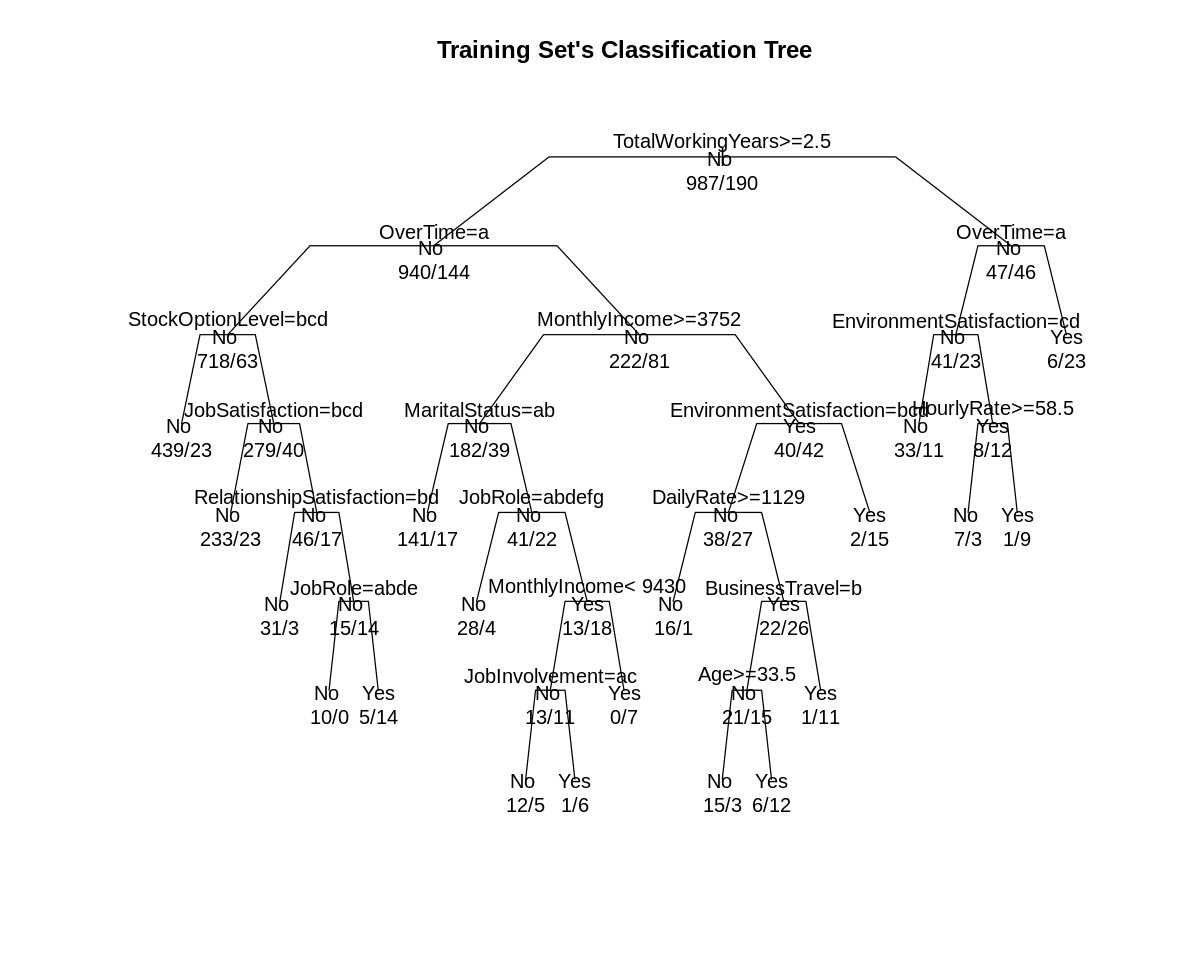

In [133]:
options(repr.plot.width=10, repr.plot.height=8)

rpart.tree <- rpart(Attrition ~ ., data=train)
plot(rpart.tree, uniform=TRUE, branch=0.6, margin=0.05)
text(rpart.tree, all=TRUE, use.n=TRUE)
title("Training Set's Classification Tree")

Warning message in brewer.pal(24, "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


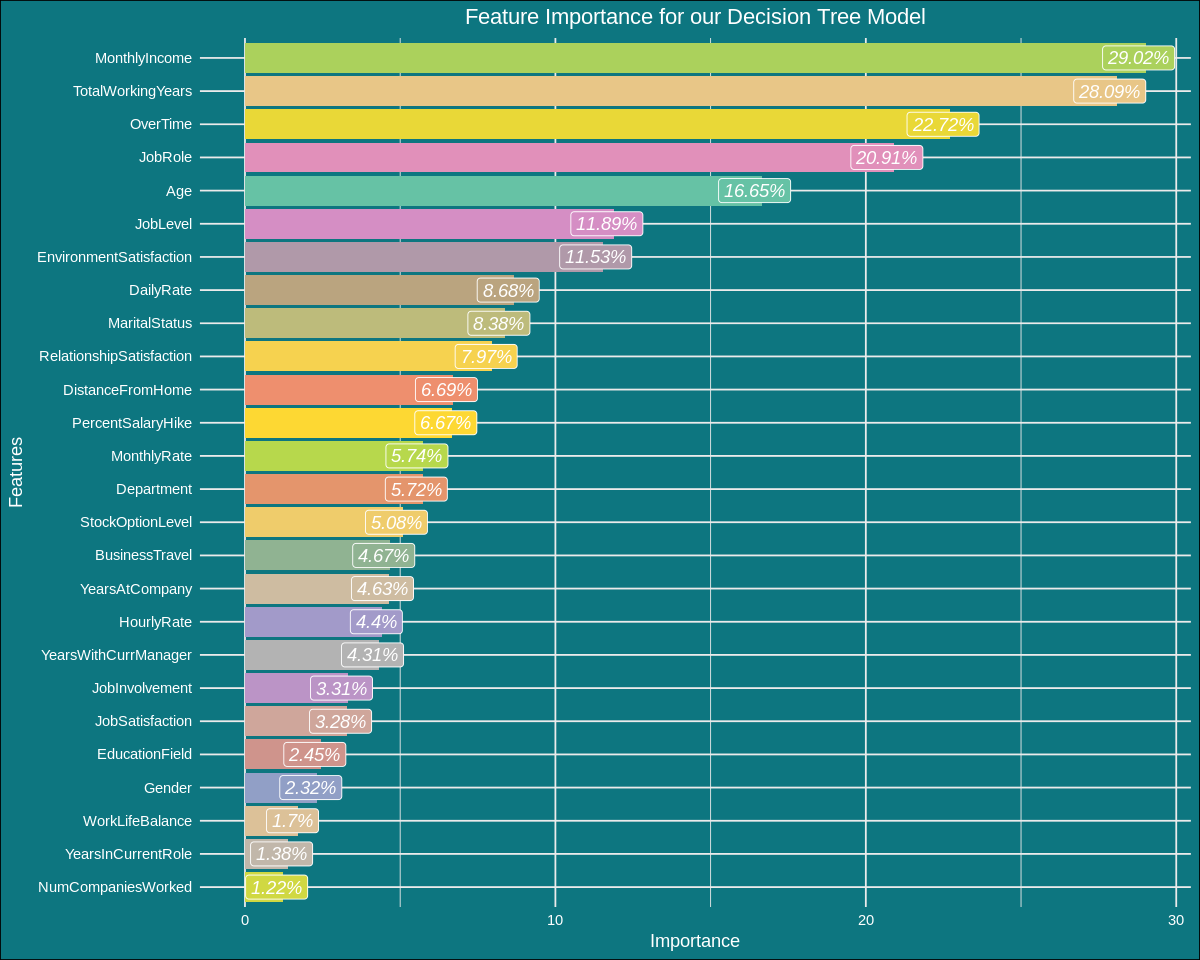

In [134]:
# Complicated DecisionTree, Is there a way to determine variable importance?
var_imp <- data.frame(rpart.tree$variable.importance)
var_imp$features <- rownames(var_imp)
var_imp <- var_imp[, c(2, 1)]
var_imp$importance <- round(var_imp$rpart.tree.variable.importance, 2)
var_imp$rpart.tree.variable.importance <- NULL

colorCount <- length(unique(var_imp$features))
feature_importance <- var_imp %>%
ggplot(aes(x=reorder(features, importance), y=importance, fill=features)) + geom_bar(stat='identity') + coord_flip() +
  theme_minimal() + theme(legend.position="none", strip.background = element_blank(), strip.text.x = element_blank(),
     plot.title=element_text(hjust=0.5, color="white"), plot.subtitle=element_text(color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"),
     legend.background = element_rect(fill="#FFF9F5",
                                  size=0.5, linetype="solid",
                                  colour ="black")) + scale_fill_manual(values = colorRampPalette(brewer.pal(24, "Set2"))(colorCount)) +
geom_label(aes(label=paste0(importance, "%")), colour = "white", fontface = "italic", hjust=0.6) +
labs(title="Feature Importance for our Decision Tree Model", x="Features", y="Importance")




feature_importance

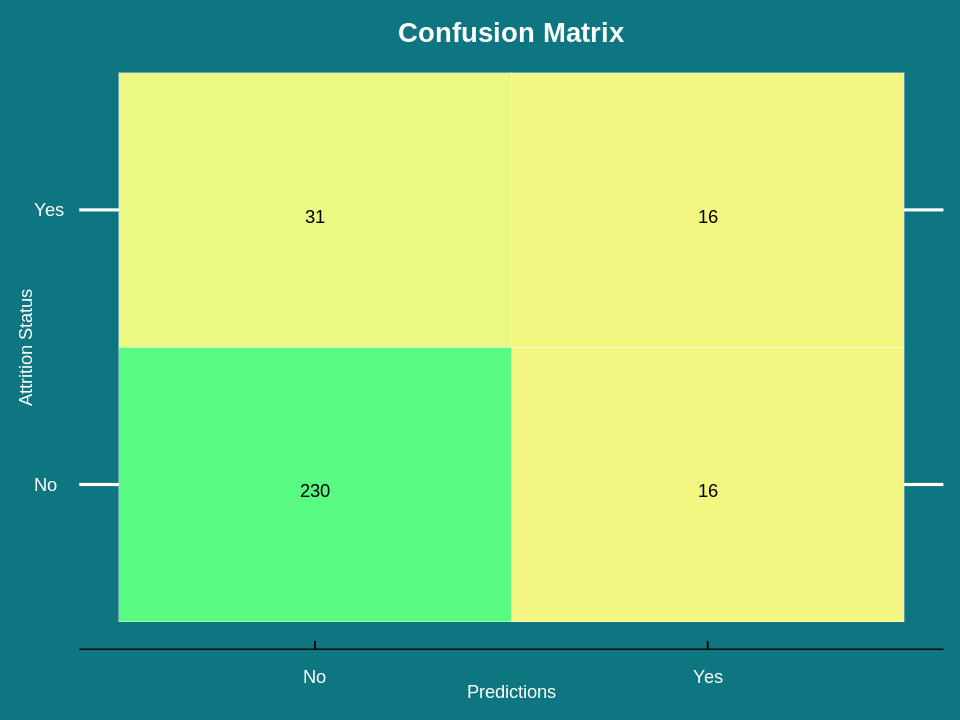

In [135]:
options(repr.plot.width=8, repr.plot.height=6)

predictions <- predict(rpart.tree, test, type="class")
conf_df <- data.frame(table(test$Attrition, predictions))

ggplot(data =  conf_df, mapping = aes(x = predictions, y = Var1)) +
  geom_tile(aes(fill = Freq), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", Freq)), vjust = 1) +
  scale_fill_gradient(low = "#F3F781", high = "#58FA82") +
  theme_economist() + theme(legend.position="none", strip.background = element_blank(), strip.text.x = element_blank(),
     plot.title=element_text(hjust=0.5, color="white"), plot.subtitle=element_text(color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"),
     legend.background = element_rect(fill="#FFF9F5",
                                  size=0.5, linetype="solid",
                                  colour ="black")) +
labs(title="Confusion Matrix", y="Attrition Status", x="Predictions")

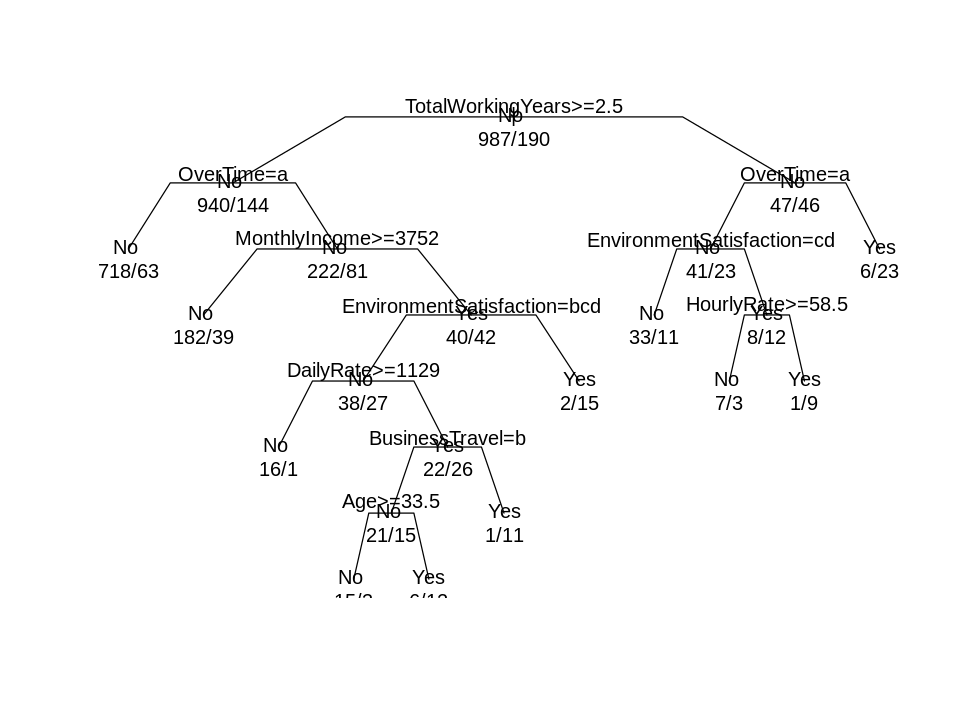

In [136]:
# Pruning reduces the size of decision trees by removing parts of the tree that do not provide power to classify instances

prune.rpart.tree <- prune(rpart.tree, cp=0.02) # pruning the tree
plot(prune.rpart.tree, uniform=TRUE, branch=0.6)
text(prune.rpart.tree, all=TRUE, use.n=TRUE)

In [144]:
# Install necessary packages if they are not already installed.
if (!require("pacman")) install.packages("pacman")
pacman::p_load(partykit)

# # Now load the packages using suppressPackageStartupMessages
# suppressPackageStartupMessages(library(tidyverse))
# suppressPackageStartupMessages(library(skimr))
# suppressPackageStartupMessages(library(GGally))
# # ... (rest of your library loading statements) ...

Loading required package: pacman

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘libcoin’, ‘mvtnorm’, ‘inum’



partykit installed



In [145]:
library(partykit)

rparty.tree <- as.party(rpart.tree)
rparty.tree


Model formula:
Attrition ~ Age + BusinessTravel + DailyRate + Department + DistanceFromHome + 
    Education + EducationField + EnvironmentSatisfaction + Gender + 
    HourlyRate + JobInvolvement + JobLevel + JobRole + JobSatisfaction + 
    MaritalStatus + MonthlyIncome + MonthlyRate + NumCompaniesWorked + 
    OverTime + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + 
    StandardHours + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + 
    WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + 
    YearsWithCurrManager

Fitted party:
[1] root
|   [2] TotalWorkingYears >= 2.5
|   |   [3] OverTime in No
|   |   |   [4] StockOptionLevel in 1, 2, 3: No (n = 462, err = 5.0%)
|   |   |   [5] StockOptionLevel in 0
|   |   |   |   [6] JobSatisfaction in 2, 3, 4: No (n = 256, err = 9.0%)
|   |   |   |   [7] JobSatisfaction in 1
|   |   |   |   |   [8] RelationshipSatisfaction in 2, 4: No (n = 34, err = 8.8%)
|   |   |   |   |   [9

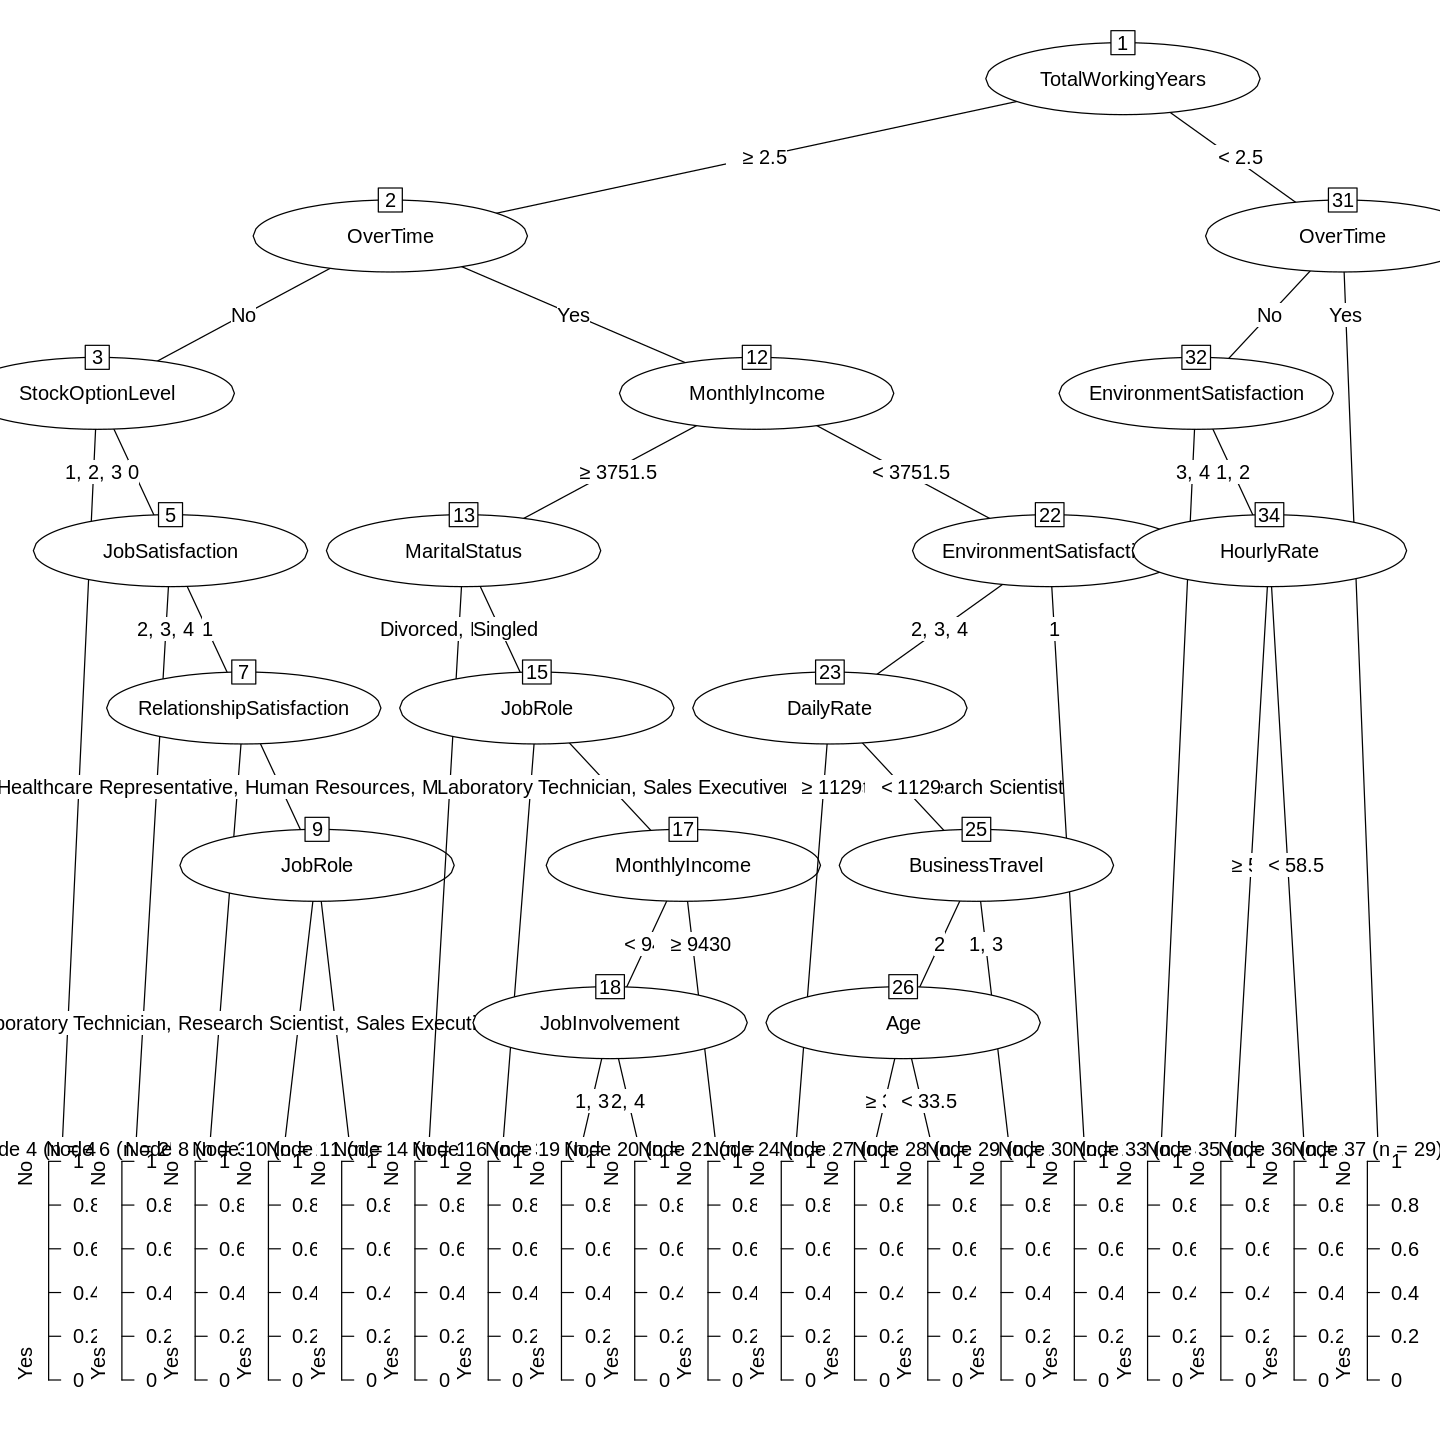

In [147]:
options(repr.plot.width=12, repr.plot.height=12)
plot(rparty.tree)

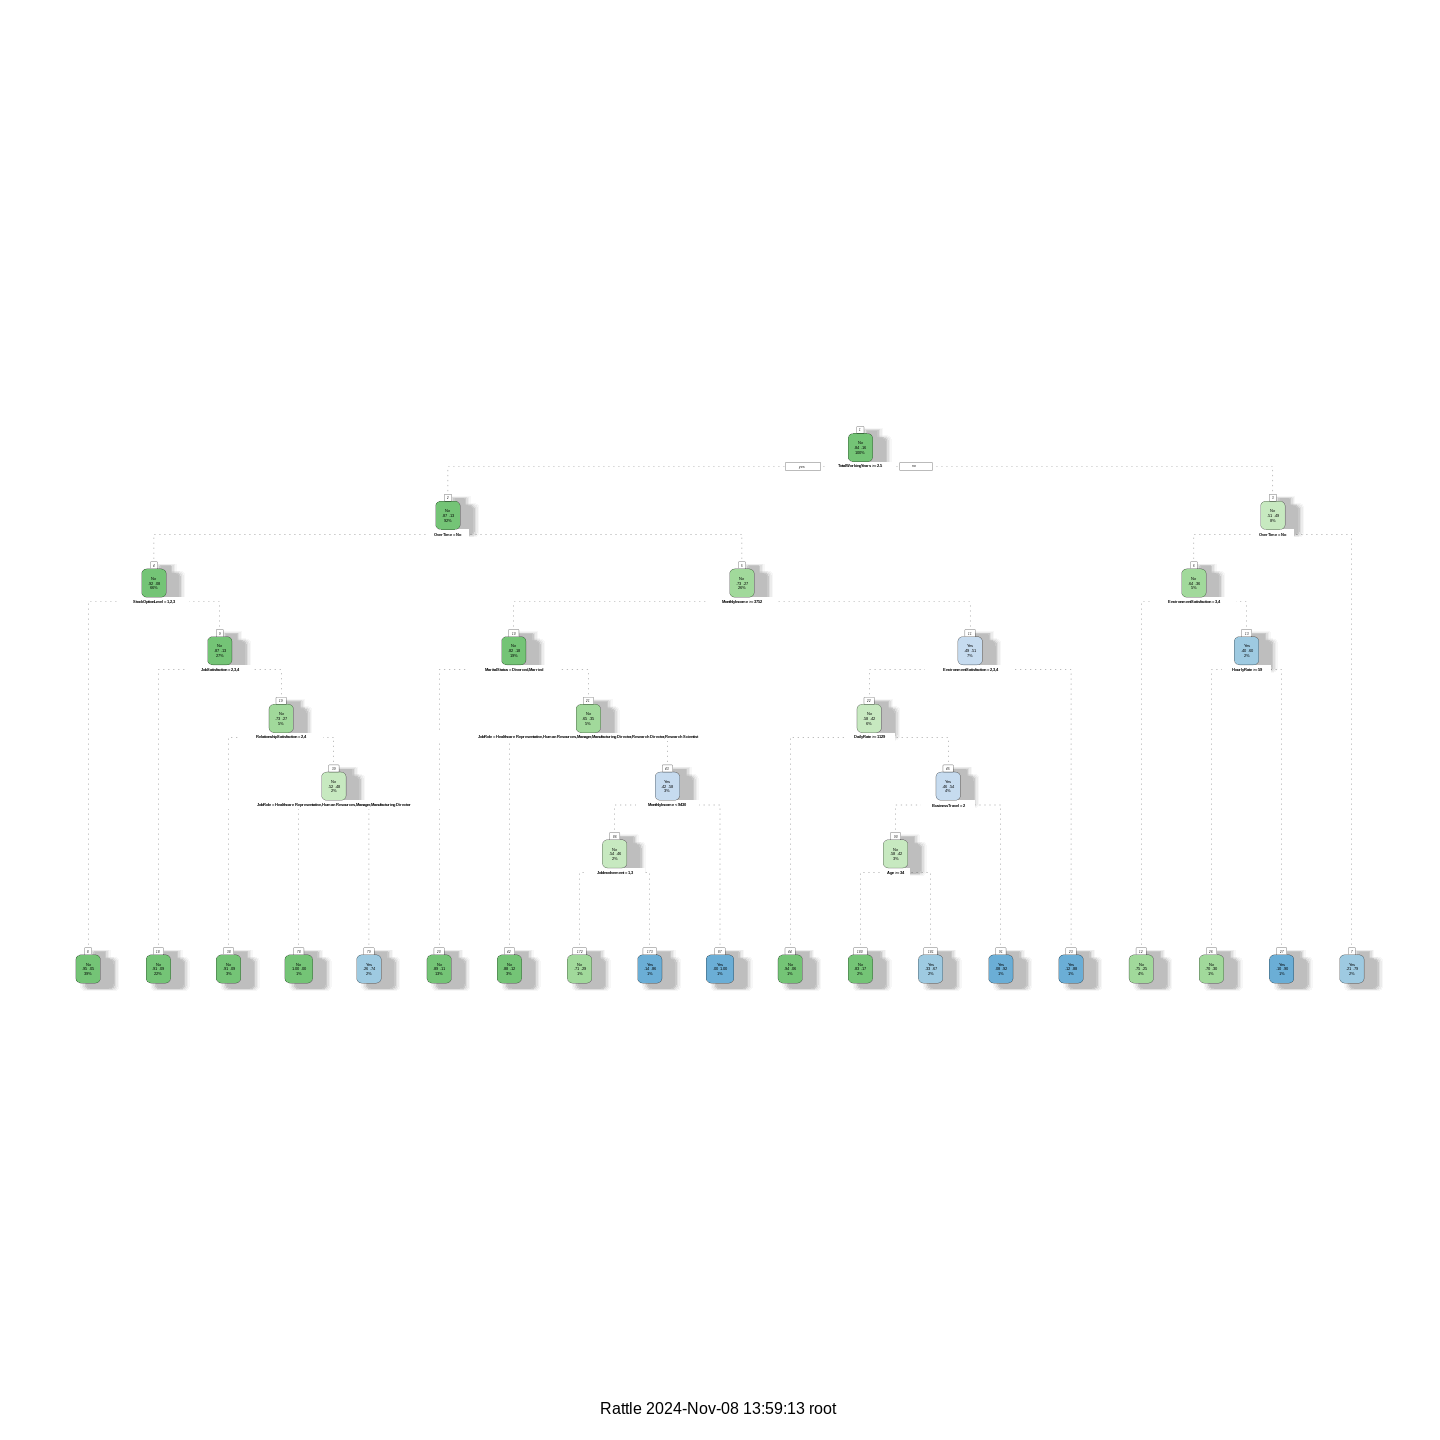

In [146]:
options(repr.plot.width=12, repr.plot.height=12)

fancyRpartPlot(rpart.tree)

In [148]:
colnames(df)

[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "DailyRate"               
 [5] "Department"               "DistanceFromHome"        
 [7] "Education"                "EducationField"          
 [9] "EmployeeCount"            "EmployeeNumber"          
[11] "EnvironmentSatisfaction"  "Gender"                  
[13] "HourlyRate"               "JobInvolvement"          
[15] "JobLevel"                 "JobRole"                 
[17] "JobSatisfaction"          "MaritalStatus"           
[19] "MonthlyIncome"            "MonthlyRate"             
[21] "NumCompaniesWorked"       "Over18"                  
[23] "OverTime"                 "PercentSalaryHike"       
[25] "PerformanceRating"        "RelationshipSatisfaction"
[27] "StandardHours"            "StockOptionLevel"        
[29] "TotalWorkingYears"        "TrainingTimesLastYear"   
[31] "WorkLifeBalance"          "YearsAtCompany"          
[33] "YearsInCurrentRole"       "YearsSinceLastPromotion" 
[35] "YearsWithCurrManager"     "Generation"              
[37] "Educational_Levels"       "CatYearsManager"

In [149]:
# Delete the following columns
delete <- c("Generation", "Educational_Levels", "CatYearsManager")
df[delete] <- NULL
head(df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6


### Using Automated Machine Learning with H2o:
<a id="h2o"></a>
H2o is a library that helps us implement the best machine learning models in order to come up with the most accurate predictions. What is really interesting about this library is that it does all the backend work for us that we normally do when implementing ML models. Maybe that's why it is an automated machinelearning library? What things does H2o does for us here are some of the things that I have seen while using H2o.
<ul>
    <li><b>Cross-Validation:</b> There is no need to worry about cross validation the automl function takes care of that. </li>
    <li><b>Parameter Optimization: </b> H2o takes care of finding the most appropiate parameters in order to come up with the most accurate solution. </li>
    <li><b>Testing Different Models: </b> H2o uses different models to come up with the most accurate solution. </li>
    </ul>
    
There are many other things that H2o does behind the scenes. If you want to know more about what does h2o does behind the scenes you can check the documentation page here <a href="http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html">Automl documentation h2o </a>

### Special Thanks to Matt Dancho:
It wouldn't be possible for me to have done this kernel if it wasn't for the amazing work Matt Dancho has been doing by publishing excellent work related to the Data cience field. If you are new to R, I would recommend to buy his course and if you don't have the money at the moment to buy the course, check his learning labs course you will learn a lot by looking at those courses. Here I will leave you the H2o learning labs video. <a href="https://www.youtube.com/watch?v=7Cusb3B8jcM&list=PLo32uKohmrXvDwyyty6pC4mcWER5tSdmO&index=4"> Machine Learning with H2o </a>

In [151]:
h2o.init()

# Putting the original dataframe into an h2o format
h2o_df <- as.h2o(df)

# Splitting into training, validation and testing sets
split_df <- h2o.splitFrame(h2o_df, c(0.7, 0.15), seed=12)

# Obtaining our three types of sets into three separate values
h2o_train <- h2o.assign(split_df[[1]], "train")
h2o_validation <- h2o.assign(split_df[[2]], "validation")
h2o_test <- h2o.assign(split_df[[2]], "test")

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         9 minutes 7 seconds 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.44.0.3 
    H2O cluster version age:    10 months and 18 days 
    H2O cluster name:           H2O_started_from_R_root_rsv726 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.17 GB 
    H2O cluster total cores:    2 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:                  R version 4.4.2 (2024-10-31) 


Warning message in h2o.clusterInfo():
“
Your H2O cluster version is (10 months and 18 days) old. There may be a newer version available.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html”



  |======================================================================| 100%


In [152]:
h2o.describe(h2o_train)

Label,Type,Missing,Zeros,PosInf,NegInf,Min,Max,Mean,Sigma,Cardinality
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age,int,0,0,0,0,18,60,3.695873e+01,9.2341317,NA
Attrition,string,0,0,0,0,NaN,NaN,NA,NA,NA
BusinessTravel,string,0,0,0,0,NaN,NaN,NA,NA,NA
DailyRate,int,0,0,0,0,102,1499,7.901727e+02,405.2567110,NA
Department,string,0,0,0,0,NaN,NaN,NA,NA,NA
DistanceFromHome,int,0,0,0,0,1,29,9.029750e+00,8.0638707,NA
Education,int,0,0,0,0,1,5,2.901152e+00,1.0180025,NA
EducationField,string,0,0,0,0,NaN,NaN,NA,NA,NA
EmployeeCount,int,0,0,0,0,1,1,1.000000e+00,0.0000000,NA


In [153]:
# Establish X and Y (Features and Labels)
y <- "Attrition"
x <- setdiff(names(h2o_train), y)

In [ ]:
auto_ml <- h2o.automl(
    y = y,
    x = x,
    training_frame = h2o_train,
    leaderboard_frame = h2o_validation,
    project_name = "Attrition",
    max_models = 10,
    seed = 12
)

In [158]:
library(h2o)

# Initialize H2O cluster (or connect to an existing one)
h2o.init()

# ... (your existing code for loading and splitting data) ...

# List existing H2O AutoML projects
existing_projects <- h2o.automl.list_models()

# If "Attrition" exists in the list, remove it
if ("Attrition" %in% sapply(existing_projects, function(x) x@project_name)) {
  h2o.automl.remove_models(project_name = "Attrition")
}

# Now run h2o.automl with a fresh leaderboard
auto_ml <- h2o.automl(
  y = y,
  x = x,
  training_frame = h2o_train,
  leaderboard_frame = h2o_validation,
  project_name = "Attrition", # You can also try a different project name
  max_models = 10,
  seed = 12
)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         12 minutes 33 seconds 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.44.0.3 
    H2O cluster version age:    10 months and 18 days 
    H2O cluster name:           H2O_started_from_R_root_rsv726 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.17 GB 
    H2O cluster total cores:    2 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:                  R version 4.4.2 (2024-10-31) 


Warning message in h2o.clusterInfo():
“
Your H2O cluster version is (10 months and 18 days) old. There may be a newer version available.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html”


ERROR: Error in h2o.automl.list_models(): could not find function "h2o.automl.list_models"


In [155]:
# Check for the top models
top_models <- auto_ml@leaderboard
print(top_models)

ERROR: Error: object 'auto_ml' not found


In [ ]:
# Get the best model
# Our aim is to determine the feature importance
model_id <- as.data.frame(top_models$model_id)[,1]
best_family <- h2o.getModel(grep("StackedEnsemble_BestOfFamily", model_id, value=TRUE)[1])
obtain_model <- h2o.getModel(best_family@model$metalearner$name)

In [ ]:
# How important is each model to the StackEnsemble
h2o.varimp(obtain_model)

In [ ]:
options(repr.plot.width=8, repr.plot.height=4)
h2o.varimp_plot(obtain_model)

In [ ]:
xgb <- h2o.getModel(grep("XGBoost", model_id, value = TRUE)[1])

# Examine the variable importance of the top XGBoost model
# XGBoost can show the feature importance as oppose to the stack ensemble
h2o.varimp(xgb)

In [ ]:
# We can also plot the base learner contributions to the ensemble.
h2o.varimp_plot(xgb)

### Top Reasons why Employees leave the Organization:
<a id="top_reasons"></a>
<ul>
    <li><b>No Overtime</b> This was a surpirse, employees who don't have overtime are most likely to leave the organization. This could be that employees would like to have a higher amount of income or employees could feel that they are underused. </li>
    <li><b>Monthly Income: </b> As expected, Income is a huge factor as why employees leave the organization in search for a better salary. </li>
    <li><b>Age:</b> </li> This could also be expected, since people who are aiming to retire will leave the organization.
</ul>

Knowing the most likely reasons why employees leave the organization, can help the organization take action and reduce the level of Attrition inside the organization.